# ***Hajj | Umrah(crowd management) Data Analysis & Forecasting & ML***


## ***📈 Introduction***

**The Hajj and Umrah pilgrimages attract millions of pilgrims each year to the holy cities of Mecca and Medina. Effective crowd management is essential to ensure the safety and comfort of pilgrims. This notebook aims to analyze various factors that affect crowd dynamics during these religious events. By utilizing data collected on pilgrims' movements, environmental conditions, and experiences, we can derive insights that may enhance future crowd management strategies.**

## 🎯 Goals of the Notebook

**1.**   **Understand Crowd Dynamics: Analyze factors affecting crowd density and movement speed to improve the flow of pilgrims.**

**2.**   **Evaluate Environmental Impact: Investigate how weather conditions, temperature, and sound levels influence crowd behavior and pilgrim experience.**

**3.**   **Assess Pilgrim Experience: Measure the overall satisfaction and perceived safety ratings of pilgrims to identify areas for improvement.**

**4.**   **Utilize Augmented Reality Systems: Explore the effectiveness of AR systems in navigation and their impact on crowd morale and movement efficiency.**

**5.**   **Predict Incident Types: Analyze historical data to forecast potential incidents and improve safety measures.**


## ***📊 Dataset Overview***
**This dataset contains information about Hajj | Umrah , including:**

*   **Timestamp**	:Date and time for crowd dynamics.
*   **Location (Lat | Long )** : The location where data was collected.
*   **Crowd_Density** : Measure of crowd density .
*   **Movement_Speed** : Average speed of movement in the area .
*   **Activity_Type** : Type of activity being performed by pilgrims .
*   **Weather_Conditions** : Description of prevailing weather conditions .
*   **Temperature**:  Description of temperature in degree .
*   **Sound_Level_dB** : Description sound level measured in decibels.
*   **AR_System_Interaction** : Indicates whether pilgrims interacted with  (AR) systems .
*   **Incident_Type** : Types of incidents recorded .
*   **Crowd_Morale** : Measure of the overall mood or attitude of the crowd .
*   **Pilgrim_Experience** : Qualitative assessment of the pilgrim experience during the event .
*   **Distance_Between_People_m** : Average distance between pilgrims in meters .
*   **Event_Type** : Type of event occurring .
*   **Time_Spent_at_Location_minutes** : Average time spent by pilgrims at location in minutes .
*   **AR_Navigation_Success** : Measure of success in navigation using AR systems .
*   **Satisfaction_Rating** : Quantitative rating of pilgrim satisfaction .
*   **Perceived_Safety_Rating** : Rating of perceived safety from the pilgrim's perspective .





# ***Section 1: Importing Necessary Libraries***

In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ***Section 2: Reading Datasets and Initial Exploration***

###  **1.Loading the Dataset**





In [200]:
df = pd.read_csv('/content/hajj_umrah_crowd_management_dataset.csv')

### **2. Displaying Basic Information About the Dataset**

In [201]:
df.head()

,Timestamp,Location_Lat,Location_Long,Crowd_Density,Movement_Speed,Activity_Type,Weather_Conditions,Temperature,Sound_Level_dB,AR_System_Interaction,...,Incident_Type,Crowd_Morale,Pilgrim_Experience,Interaction_Frequency,Distance_Between_People_m,Event_Type,Time_Spent_at_Location_minutes,AR_Navigation_Success,Satisfaction_Rating,Perceived_Safety_Rating
0,2024-02-28 05:36:50,21.258846,39.983949,High,0.90,Tawaf,Clear,44,82,Started,...,Theft,Neutral,Experienced,6,0.94,Transport Delay,77,No,2,3
1,2024-07-15 04:07:23,21.353403,39.850382,Low,0.55,Resting,Clear,39,80,Completed,...,Security Breach,Negative,First-Time,8,2.04,Religious Activity,92,No,2,3
2,2024-06-06 08:27:11,21.252375,39.937753,Medium,0.94,Prayer,Clear,32,84,Started,...,Unruly Behavior,Negative,Experienced,2,1.85,Crowd Congestion,16,Yes,5,4
3,2024-12-23 06:29:22,21.377740,39.813333,Medium,0.55,Prayer,Clear,41,79,Started,...,Unruly Behavior,Negative,Experienced,2,0.96,Transport Delay,74,No,3,3
4,2024-08-19 18:00:22,21.360457,39.950974,High,0.36,Sa’i,Rainy,44,67,Completed,...,Theft,Negative,First-Time,10,1.05,Transport Delay,20,No,3,1


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Timestamp                       10000 non-null  object 
 1   Location_Lat                    10000 non-null  float64
 2   Location_Long                   10000 non-null  float64
 3   Crowd_Density                   10000 non-null  object 
 4   Movement_Speed                  10000 non-null  float64
 5   Activity_Type                   10000 non-null  object 
 6   Weather_Conditions              10000 non-null  object 
 7   Temperature                     10000 non-null  int64  
 8   Sound_Level_dB                  10000 non-null  int64  
 9   AR_System_Interaction           10000 non-null  object 
 10  Fatigue_Level                   10000 non-null  object 
 11  Stress_Level                    10000 non-null  object 
 12  Queue_Time_minutes              1

In [203]:
df.shape

(10000, 30)

### **3.Descriptive Statistics**

In [204]:
df.describe()

,Location_Lat,Location_Long,Movement_Speed,Temperature,Sound_Level_dB,Queue_Time_minutes,Waiting_Time_for_Transport,Security_Checkpoint_Wait_Time,Interaction_Frequency,Distance_Between_People_m,Time_Spent_at_Location_minutes,Satisfaction_Rating,Perceived_Safety_Rating
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,21.299628,39.898729,0.845493,37.515400,74.914200,30.256500,59.661500,17.578400,4.969700,1.497744,65.018600,3.010100,2.986800
std,0.057664,0.057236,0.377836,4.610736,9.007439,17.681492,35.093146,7.529829,3.167015,0.570497,32.039608,1.425623,1.416554
min,21.200078,39.800043,0.200000,30.000000,60.000000,0.000000,0.000000,5.000000,0.000000,0.500000,10.000000,1.000000,1.000000
25%,21.249454,39.849039,0.520000,33.000000,67.000000,15.000000,29.000000,11.000000,2.000000,1.010000,37.000000,2.000000,2.000000
50%,21.299998,39.899346,0.840000,38.000000,75.000000,30.000000,59.000000,18.000000,5.000000,1.490000,65.000000,3.000000,3.000000
75%,21.349764,39.947166,1.170000,42.000000,83.000000,46.000000,90.000000,24.000000,8.000000,1.990000,93.000000,4.000000,4.000000
max,21.399917,39.999994,1.500000,45.000000,90.000000,60.000000,120.000000,30.000000,10.000000,2.500000,120.000000,5.000000,5.000000


### **4-Checking for Missing & Duplicated Values**

In [205]:
df.isnull().sum()

,0
Timestamp,0
Location_Lat,0
Location_Long,0
Crowd_Density,0
Movement_Speed,0
Activity_Type,0
Weather_Conditions,0
Temperature,0
Sound_Level_dB,0
AR_System_Interaction,0


<Axes: >

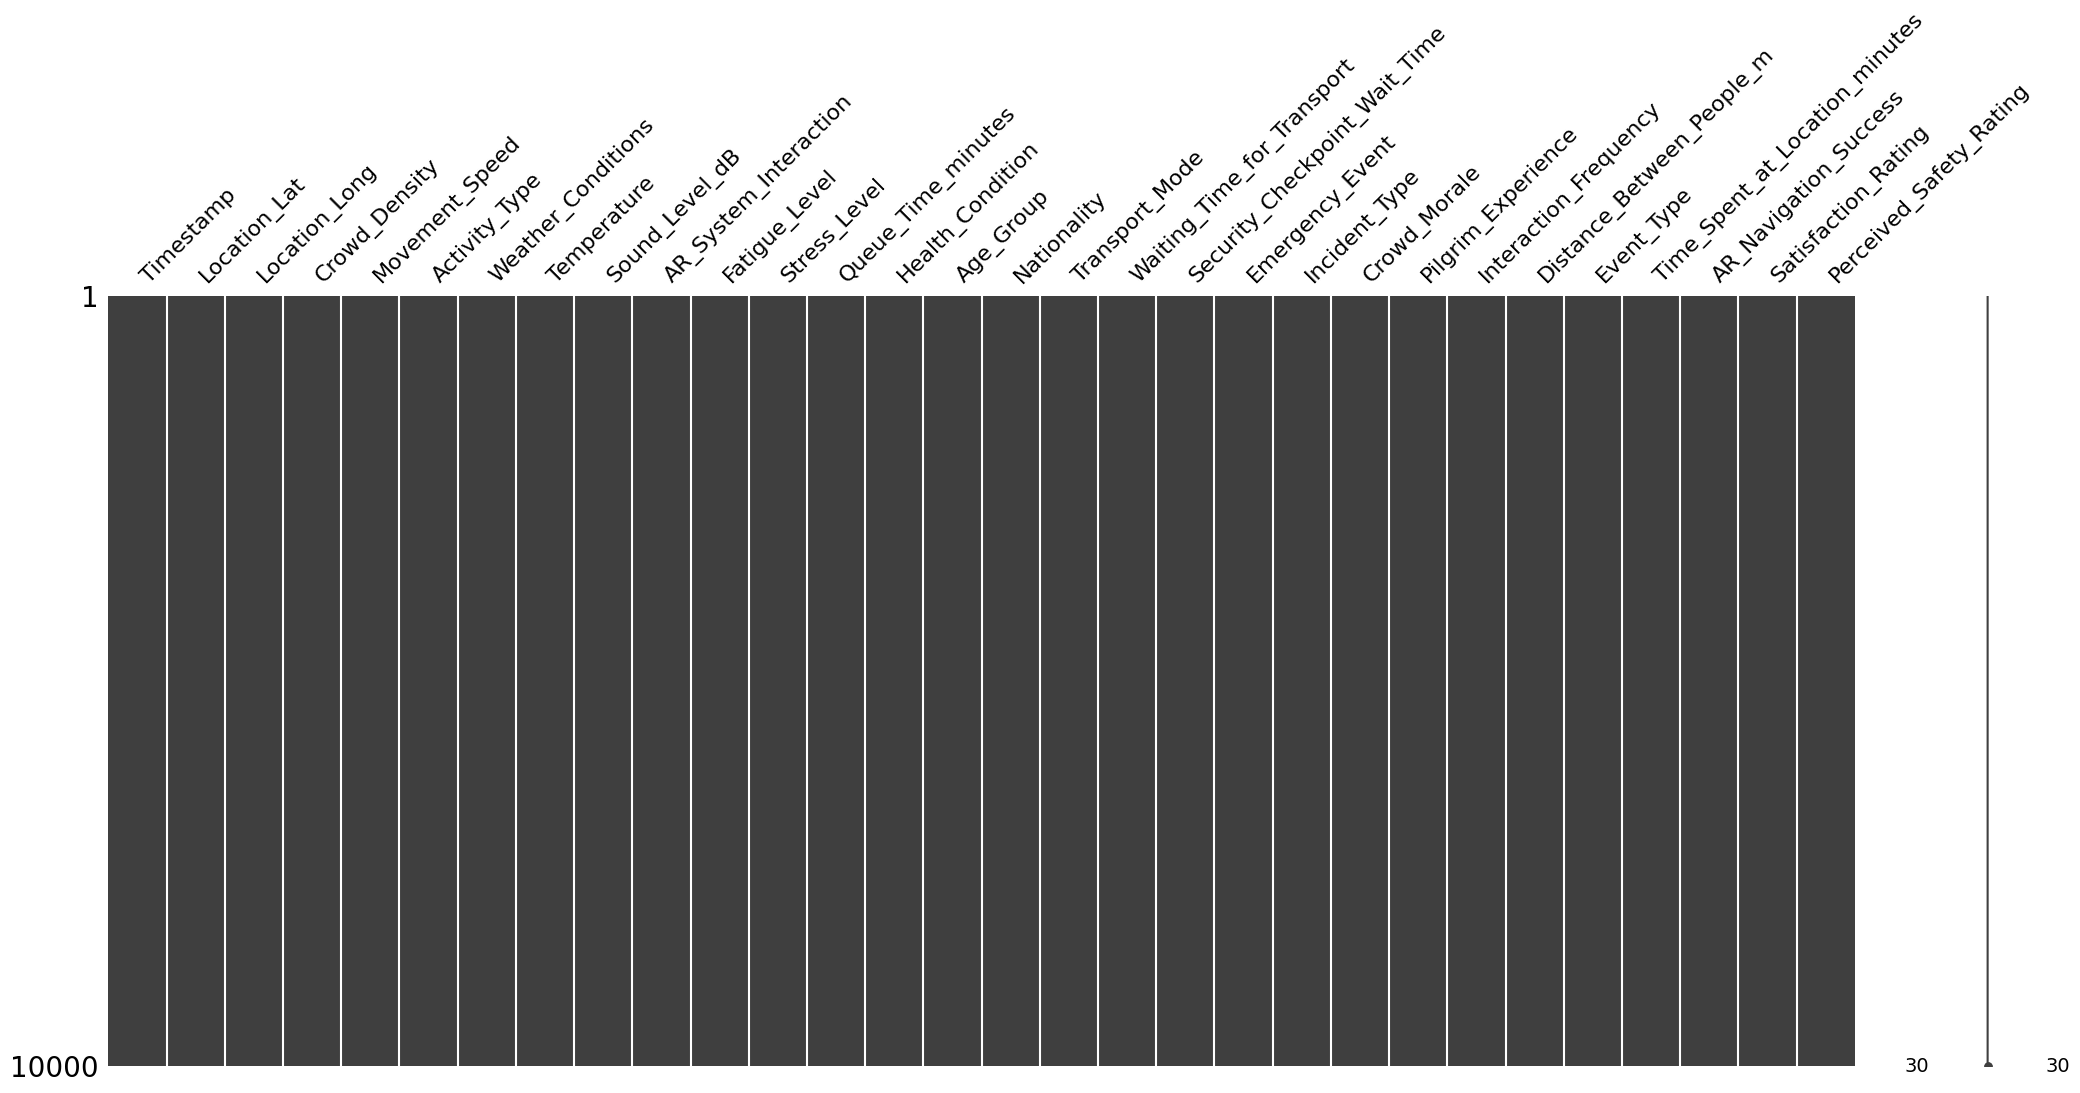

In [206]:
msno.matrix(df)

In [207]:
df.duplicated().sum()

0

### **5. Unique values**

In [208]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [209]:
for col in cat_cols:
    if col != 'Timestamp':
        print(f'{col}',df[col].unique())
        print()

Crowd_Density ['High' 'Low' 'Medium']

Activity_Type ['Tawaf' 'Resting' 'Prayer' 'Sa’i' 'Walking']

Weather_Conditions ['Clear' 'Rainy' 'Cloudy']

AR_System_Interaction ['Started' 'Completed' 'In Progress']

Fatigue_Level ['Medium' 'High' 'Low']

Stress_Level ['High' 'Medium' 'Low']

Health_Condition ['Fainting' 'Injured' 'Heatstroke' 'Normal' 'Dehydration']

Age_Group ['70+' '18-30' '51-70' '31-50']

Nationality ['Saudi' 'Pakistani' 'Egyptian' 'Indonesian' 'Indian' 'Other']

Transport_Mode ['Car' 'Walking' 'Train' 'Bus']

Emergency_Event ['Yes' 'No']

Incident_Type ['Theft' 'Security Breach' 'Unruly Behavior' 'Lost Item'
 'Medical Emergency']

Crowd_Morale ['Neutral' 'Negative' 'Positive']

Pilgrim_Experience ['Experienced' 'First-Time']

Event_Type ['Transport Delay' 'Religious Activity' 'Crowd Congestion'
 'Medical Emergency']

AR_Navigation_Success ['No' 'Yes']



# ***Section 3: Data Cleaning and Preprocessing***

###  **1. Missing or Duplicated Data**

In [210]:
# No missing or Duplicated Data

### **2.  Feature Engineering**






**1.**  **Average Time Spent per Activity : the average time spent on each activity type.**

**2.** **Time of Day Category : Categorize the time of day into segments.**

**3.** **Day of Week : Identify the day of the week .**

**4.** **Month : Identify the day of the month .**

**5.** **Year : Identify the day of the year .**

**6.** **Age Group : convert age group**

In [211]:
average_time_per_activity = df.groupby('Activity_Type')['Time_Spent_at_Location_minutes'].mean().reset_index()
activity_time_mapping = dict(zip(average_time_per_activity['Activity_Type'], average_time_per_activity['Time_Spent_at_Location_minutes']))
df['Average_Time_Spent'] = df['Activity_Type'].map(activity_time_mapping)
df['Average_Time_Spent'] = df['Average_Time_Spent'].astype(int)


In [212]:
df['Hour_of_Day'] = pd.to_datetime(df['Timestamp']).dt.hour
def categorize_time_of_day(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'
df['Time_of_Day_Category'] = df['Hour_of_Day'].apply(categorize_time_of_day)

In [213]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day_of_Week'] = df['Timestamp'].dt.day_name()

In [214]:
df['Month_of_year'] = df['Timestamp'].dt.month_name()

In [215]:
df['Year'] = df['Timestamp'].dt.year


In [216]:
def age_group_to_category(Age_group):
    if Age_group == '70+':
        return 'Senior'
    elif Age_group == '18-30':
        return 'YoungAdult'
    elif Age_group == '31-50':
        return 'MiddleAged'
    elif Age_group == '46-60':
        return 'OlderAdult'
    elif Age_group == '51-70':
        return 'OlderAdult'
    else:
        return 'Unknown'

df['Age_Category'] = df['Age_Group'].apply(age_group_to_category)


In [217]:
df.drop('Hour_of_Day', axis=1, inplace=True)
df.drop('Timestamp' , axis=1 , inplace=True)
df.drop('Time_Spent_at_Location_minutes' , axis=1 , inplace=True)
df.drop('Age_Group' , axis=1 , inplace=True)

In [218]:
df.head()

,Location_Lat,Location_Long,Crowd_Density,Movement_Speed,Activity_Type,Weather_Conditions,Temperature,Sound_Level_dB,AR_System_Interaction,Fatigue_Level,...,Event_Type,AR_Navigation_Success,Satisfaction_Rating,Perceived_Safety_Rating,Average_Time_Spent,Time_of_Day_Category,Day_of_Week,Month_of_year,Year,Age_Category
0,21.258846,39.983949,High,0.90,Tawaf,Clear,44,82,Started,Medium,...,Transport Delay,No,2,3,64,Night,Wednesday,February,2024,Senior
1,21.353403,39.850382,Low,0.55,Resting,Clear,39,80,Completed,High,...,Religious Activity,No,2,3,65,Night,Monday,July,2024,YoungAdult
2,21.252375,39.937753,Medium,0.94,Prayer,Clear,32,84,Started,High,...,Crowd Congestion,Yes,5,4,64,Morning,Thursday,June,2024,YoungAdult
3,21.377740,39.813333,Medium,0.55,Prayer,Clear,41,79,Started,Low,...,Transport Delay,No,3,3,64,Morning,Monday,December,2024,YoungAdult
4,21.360457,39.950974,High,0.36,Sa’i,Rainy,44,67,Completed,Low,...,Transport Delay,No,3,1,64,Evening,Monday,August,2024,OlderAdult


# ***Section 4: Exploratory Data Analysis (EDA)***

In [219]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

### **1.  Basic EDA**

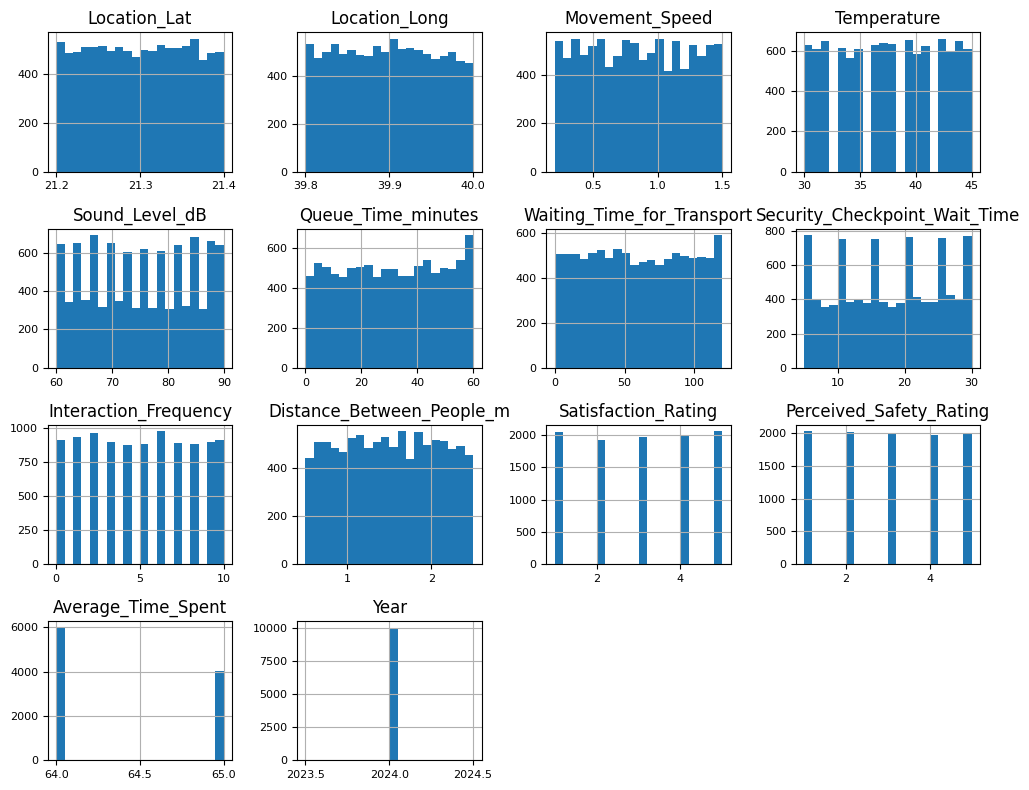

In [220]:
df[num_cols].hist(figsize=(10, 8), bins=20, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.xlabel('Value', fontsize=10 , rotation=45)
plt.ylabel('Frequency', fontsize=10)
plt.show()

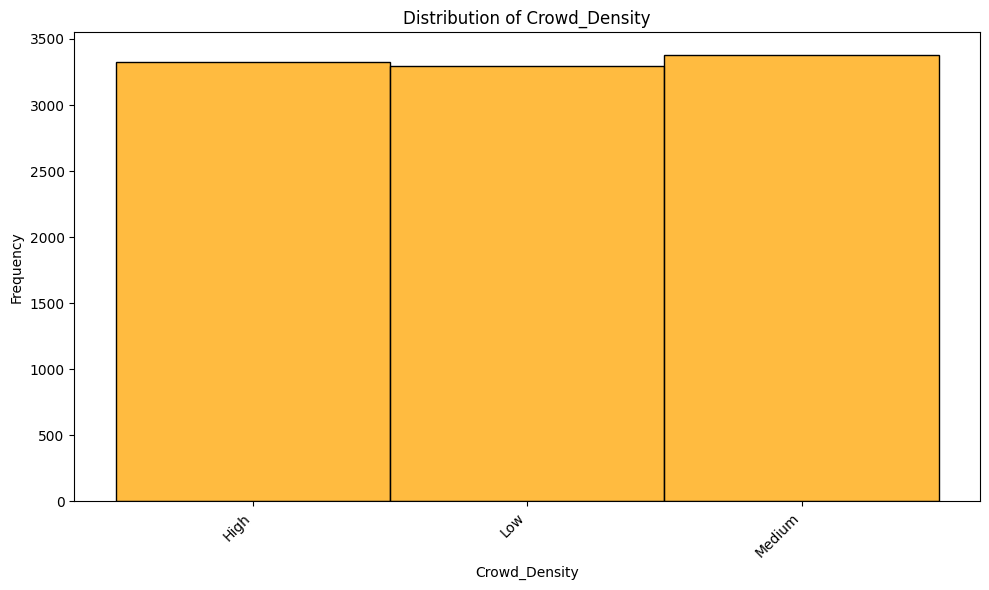

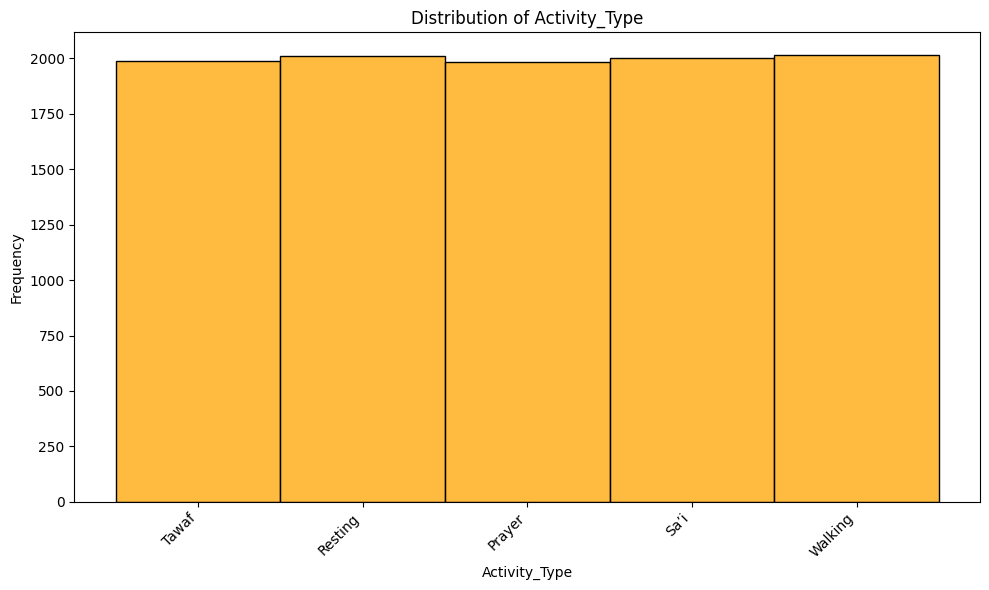

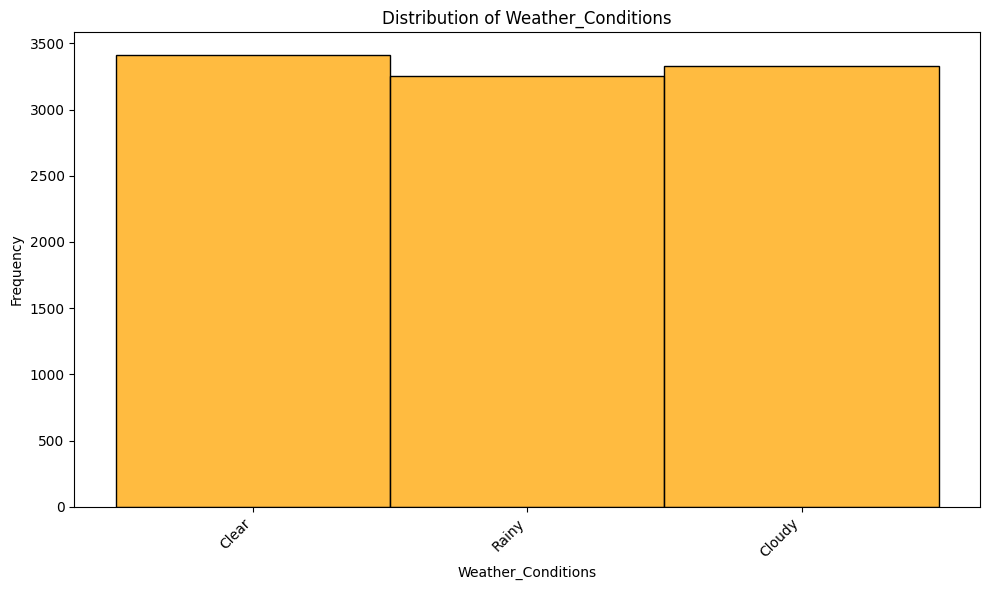

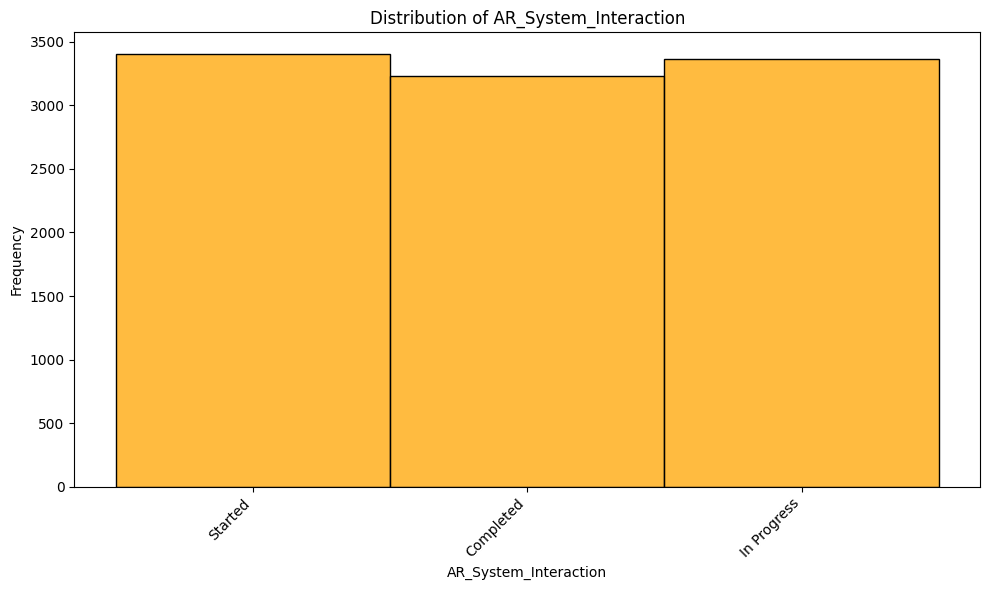

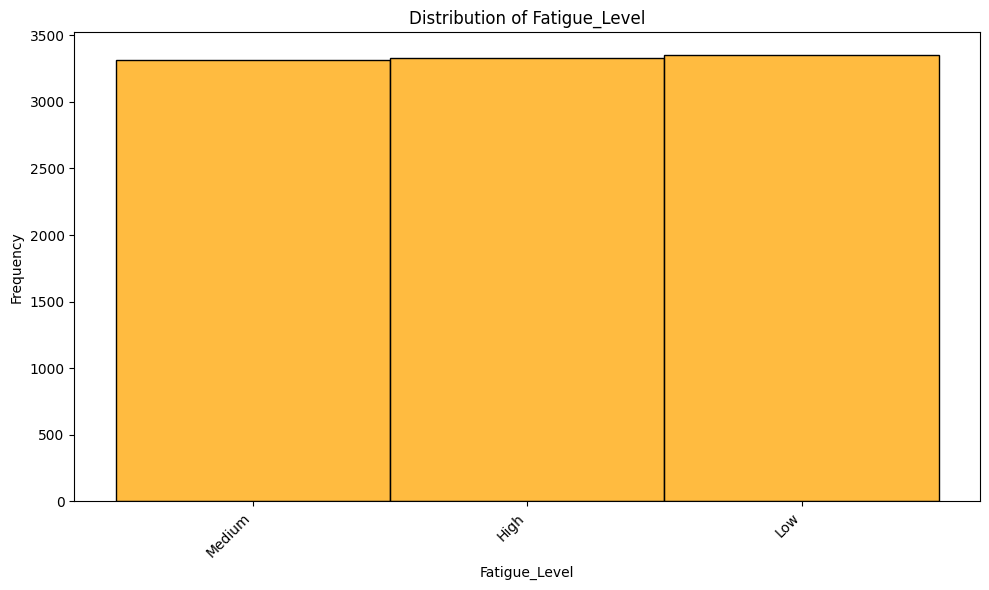

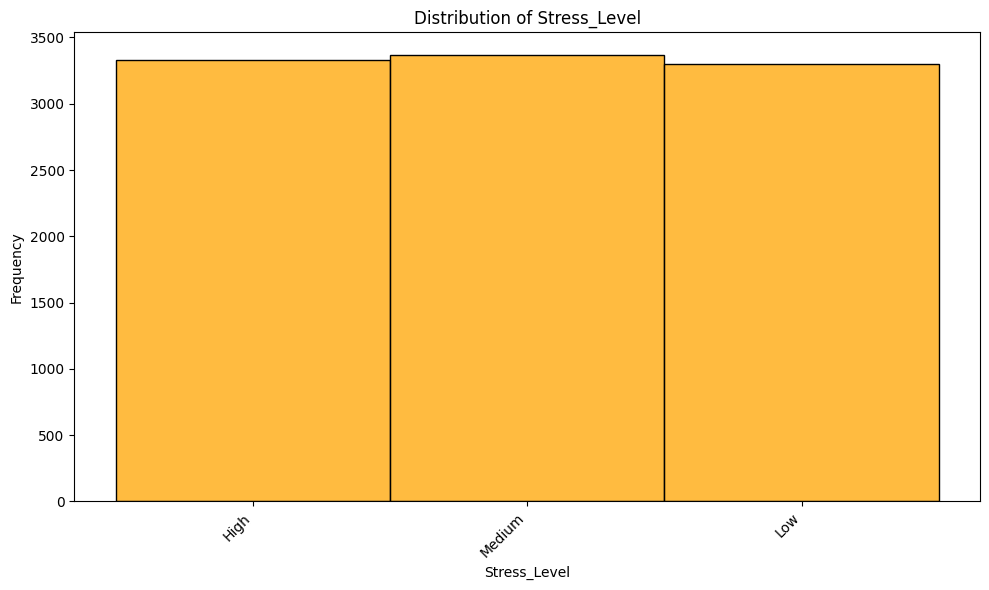

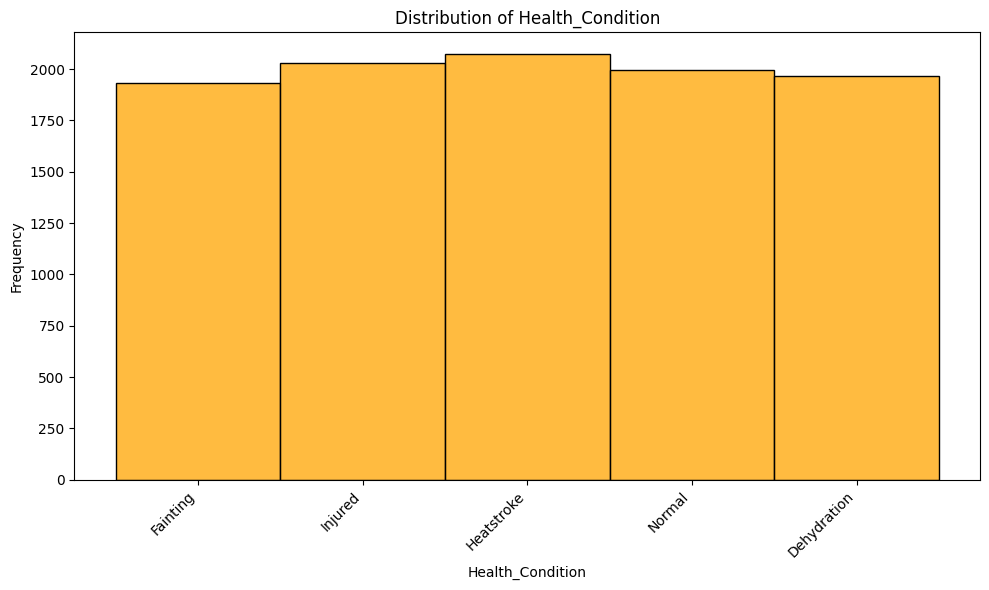

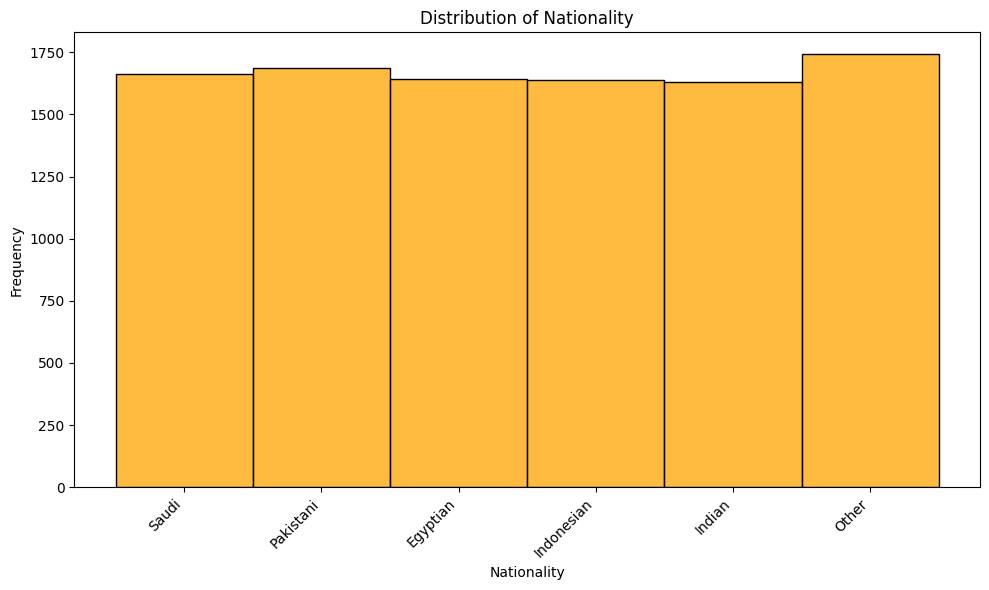

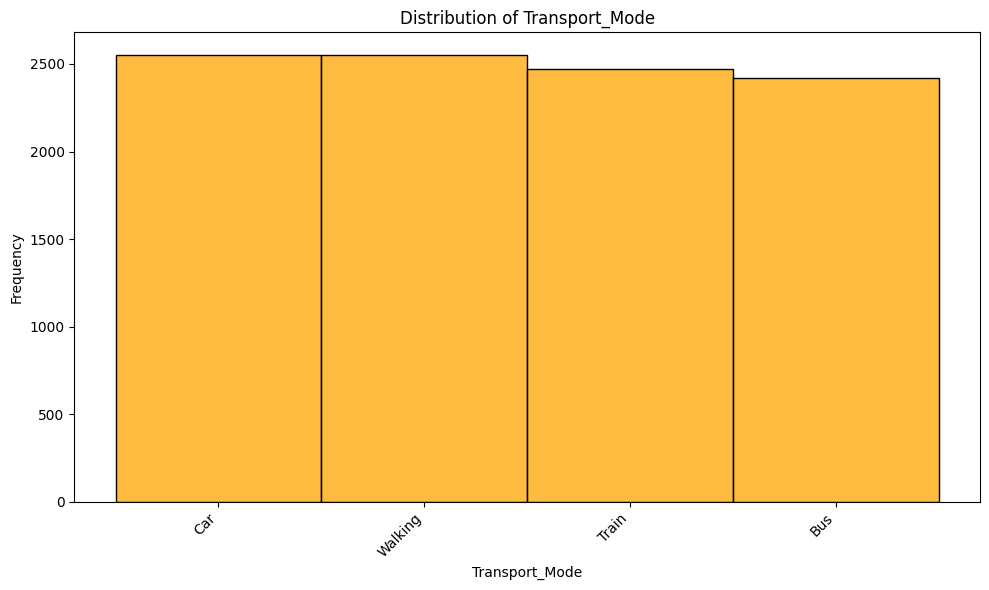

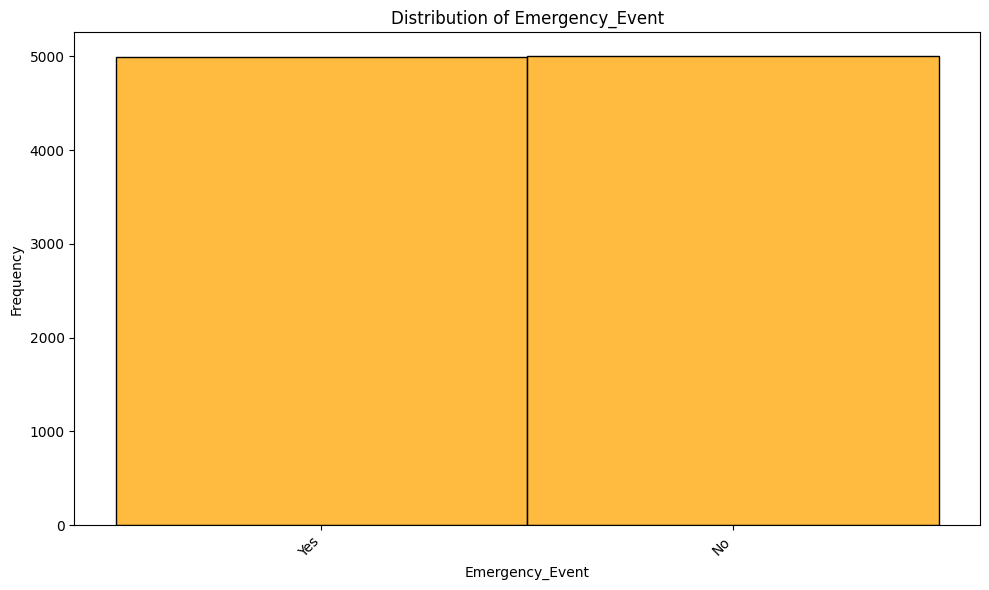

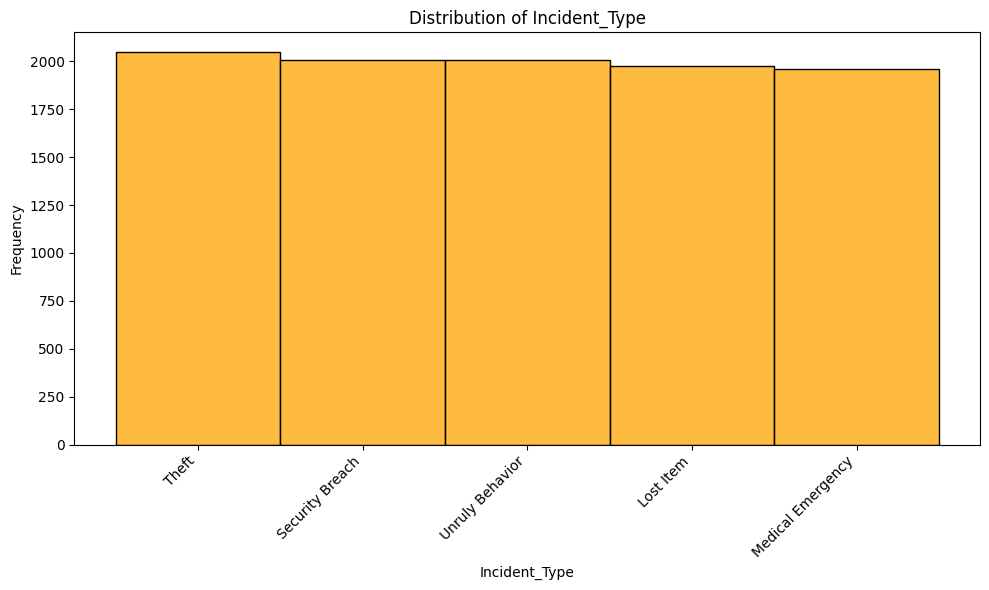

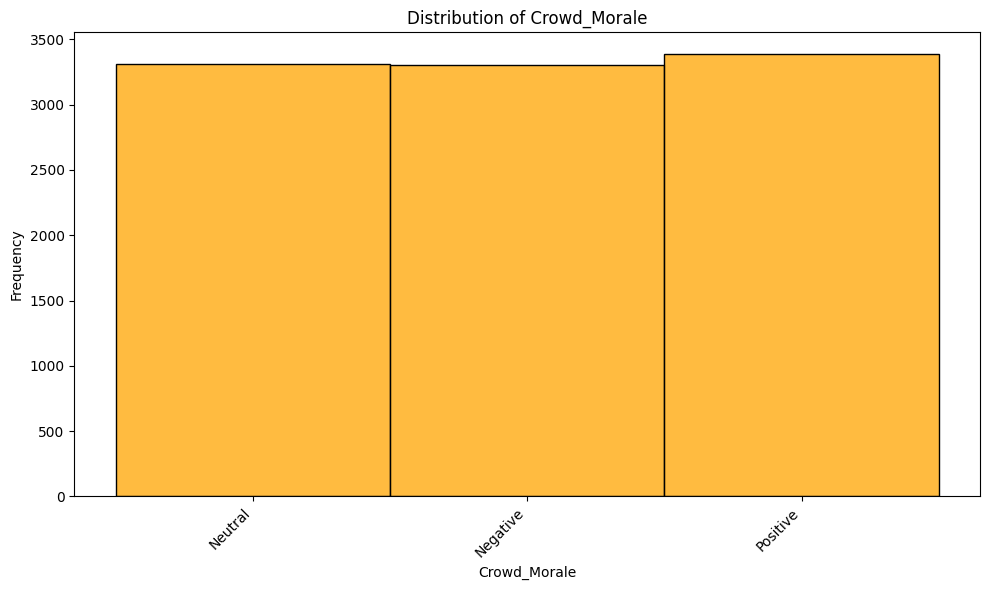

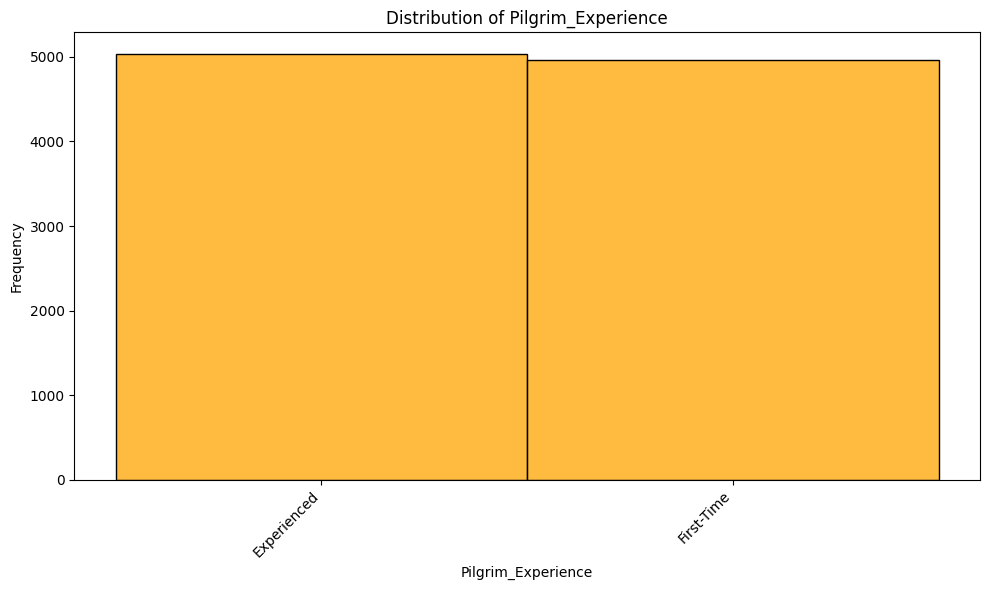

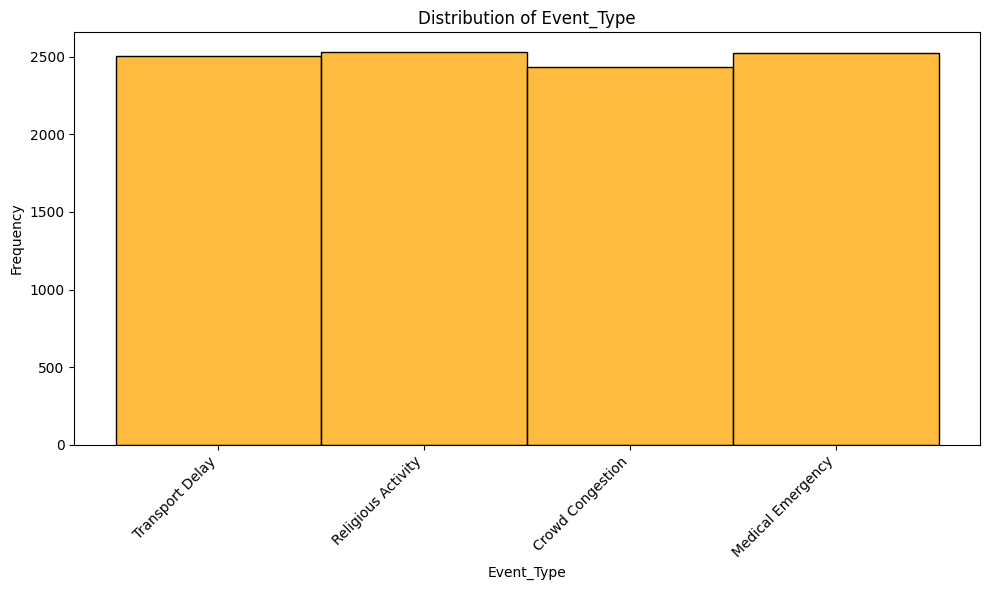

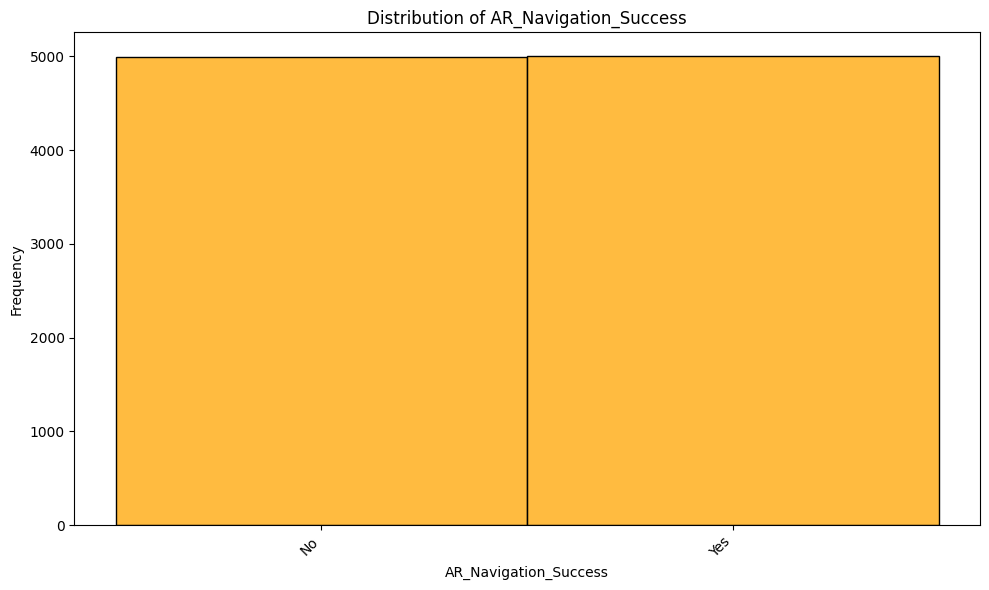

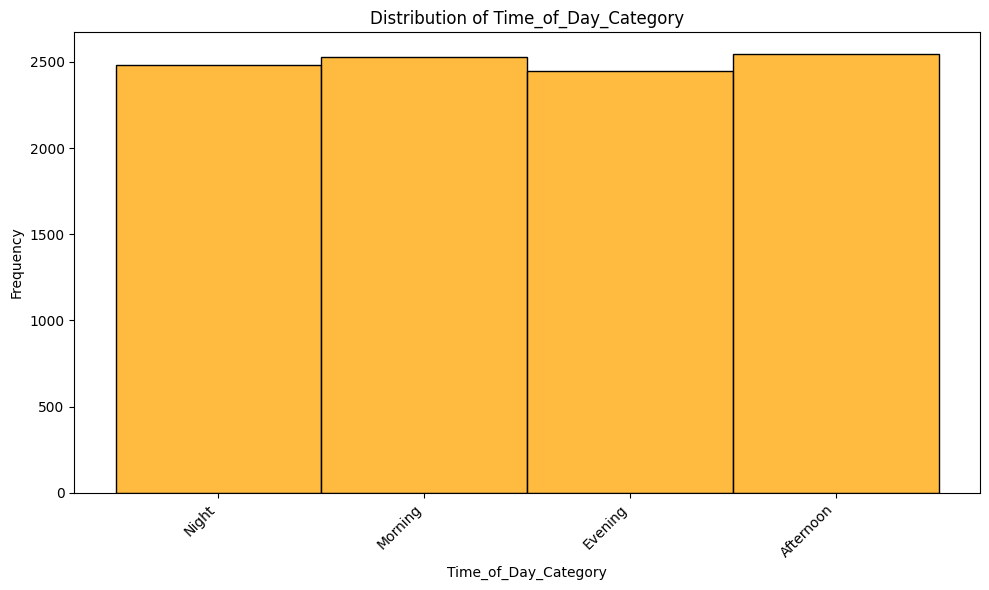

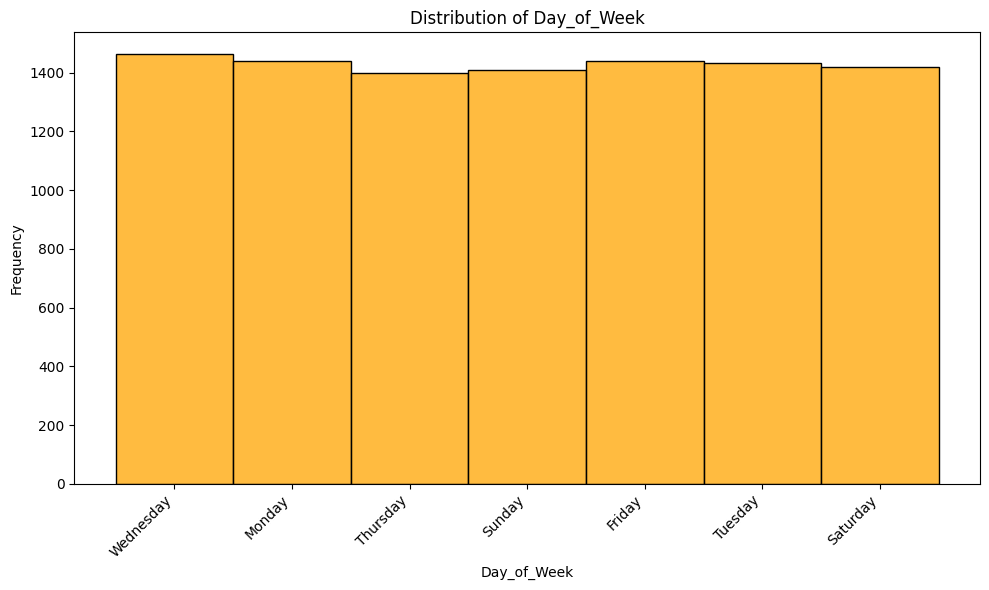

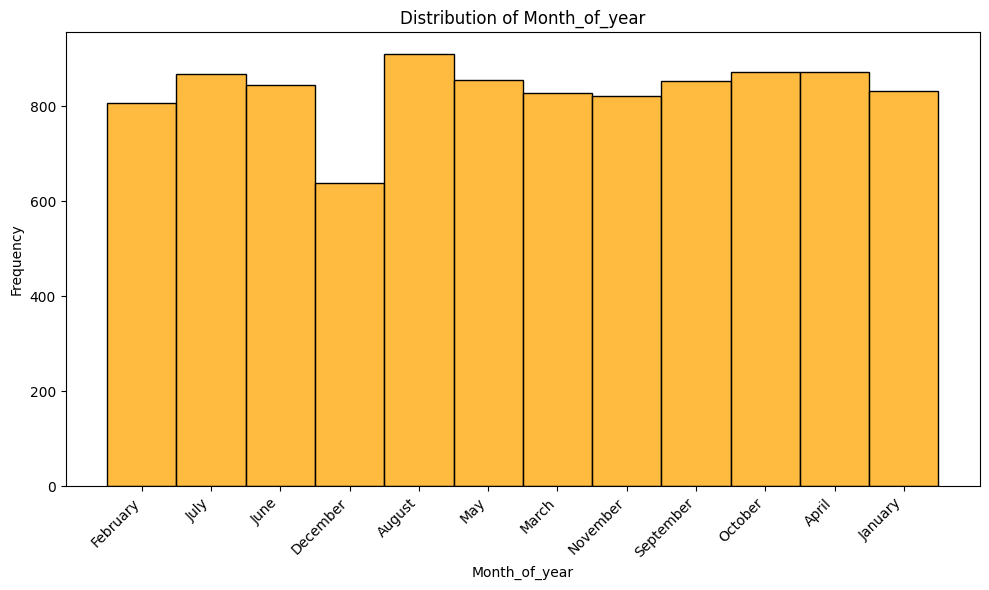

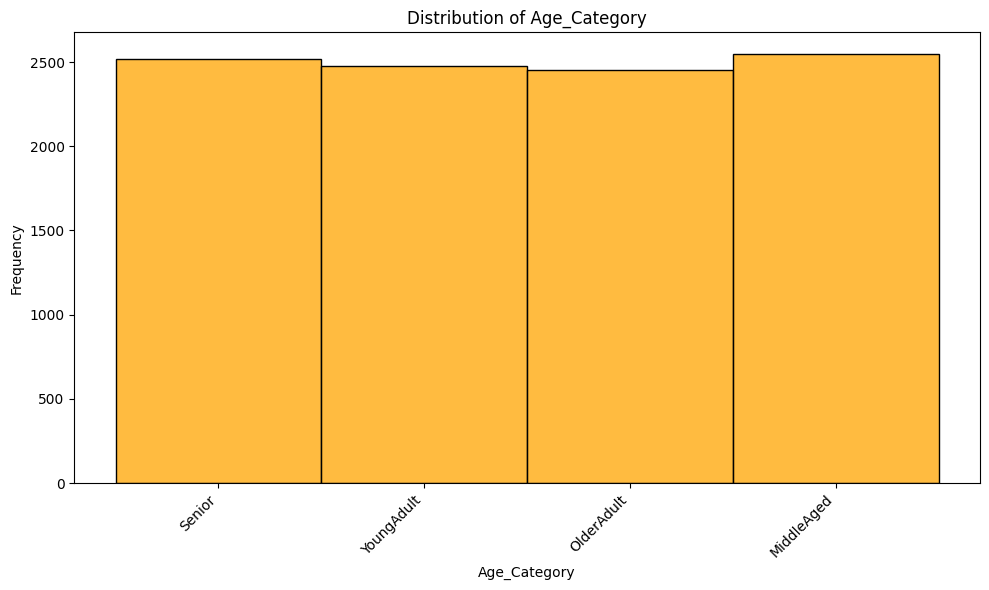

In [221]:
for col in cat_cols:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[col], bins=30, kde=False, color='orange')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

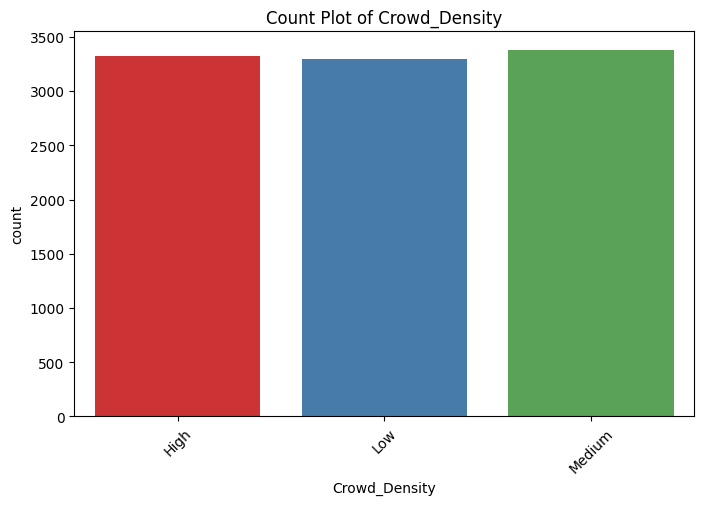

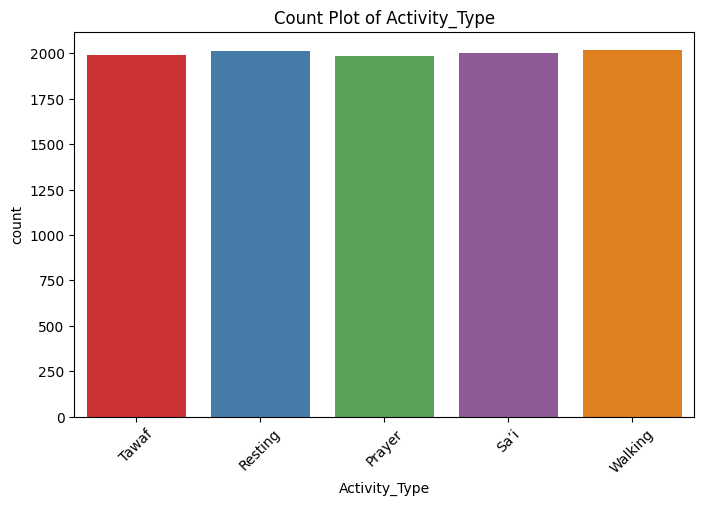

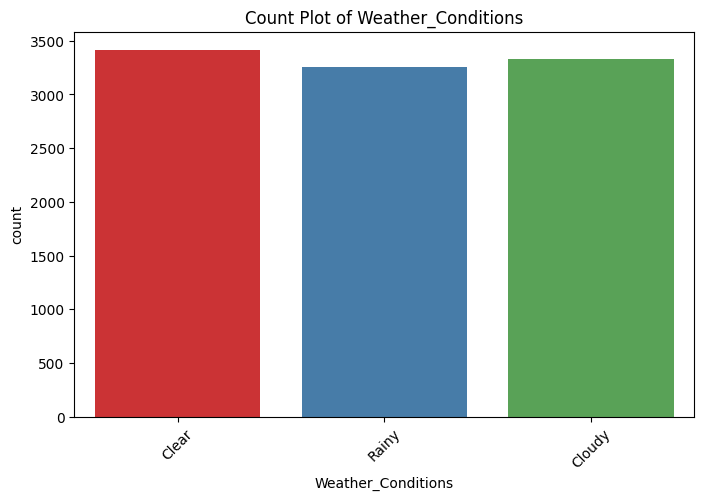

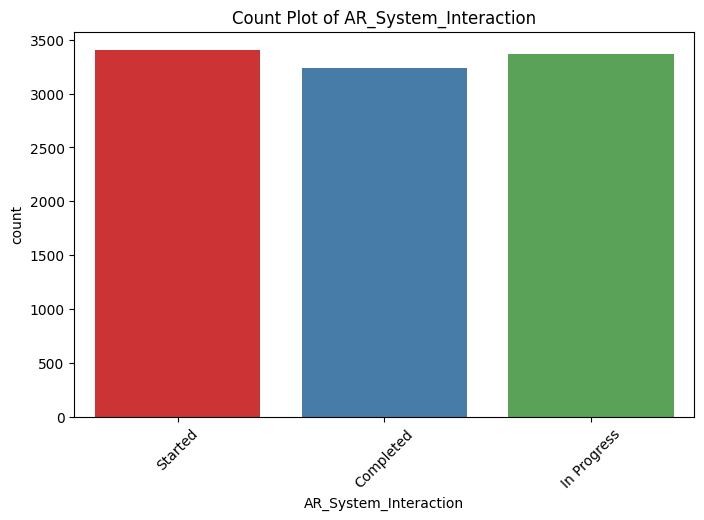

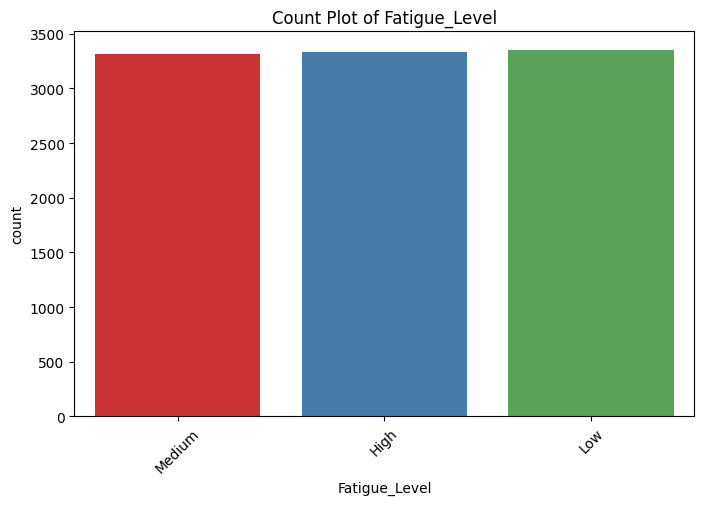

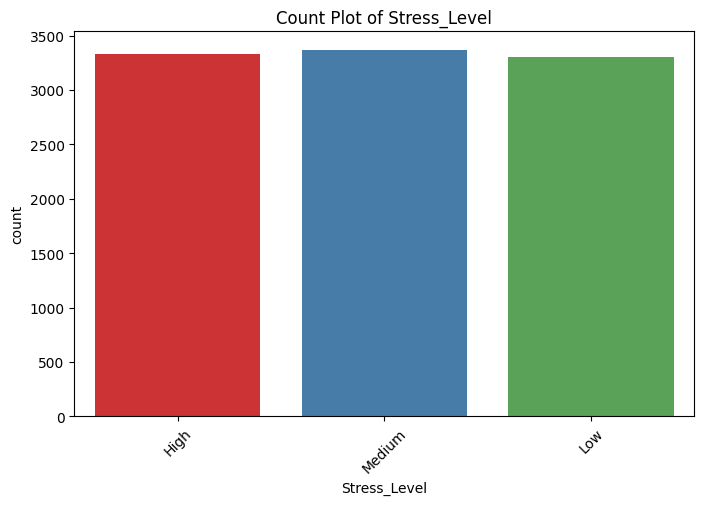

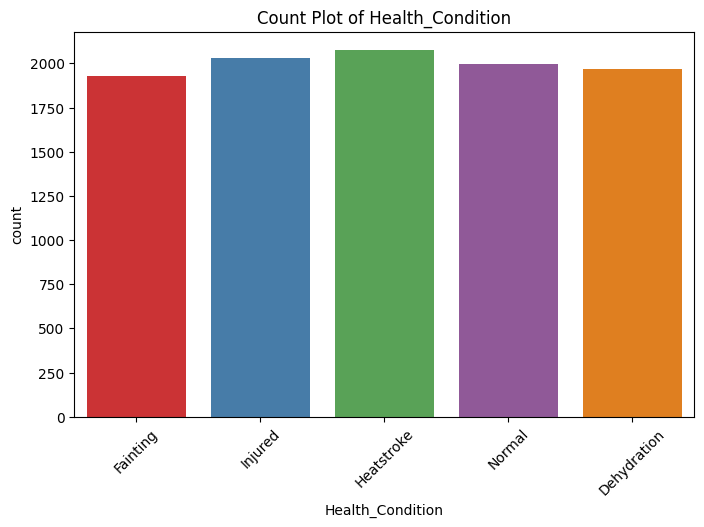

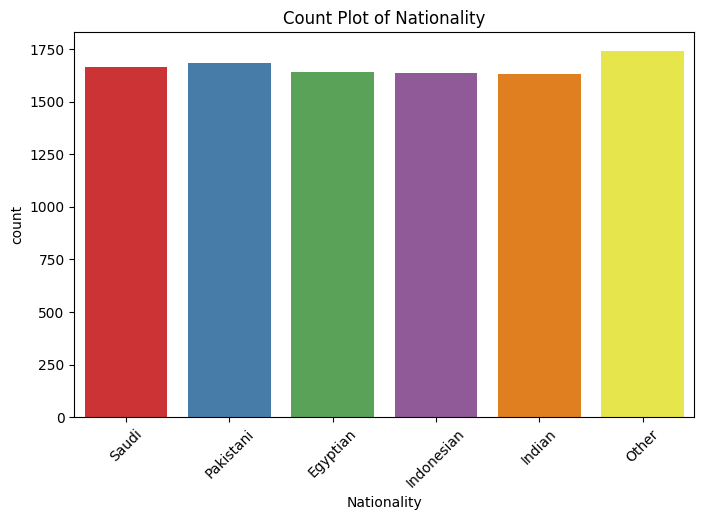

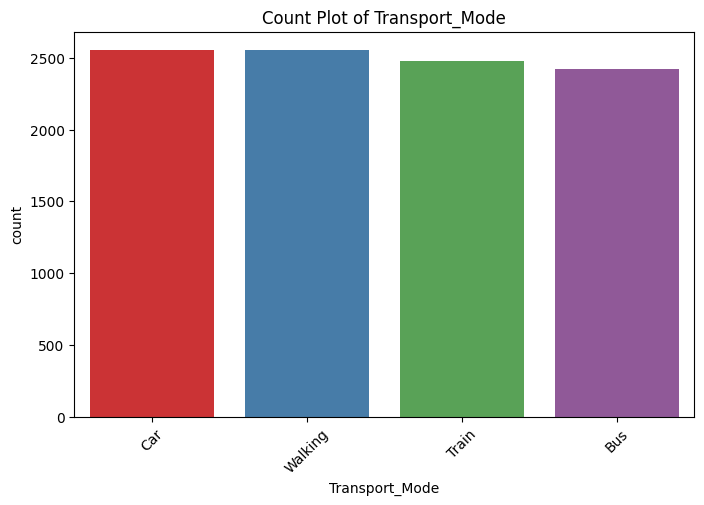

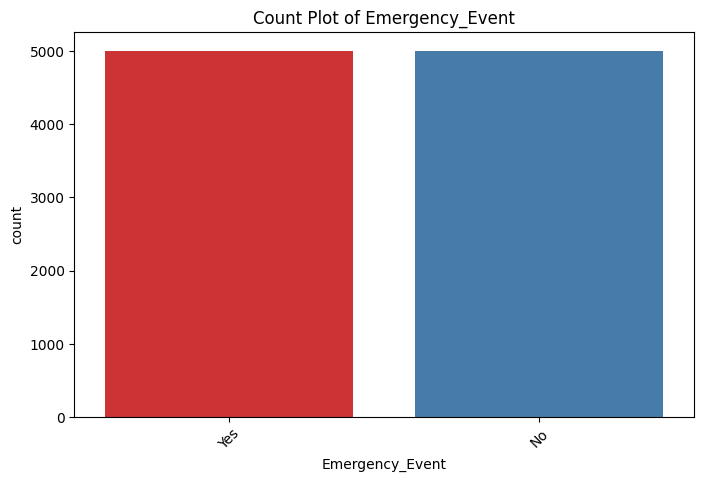

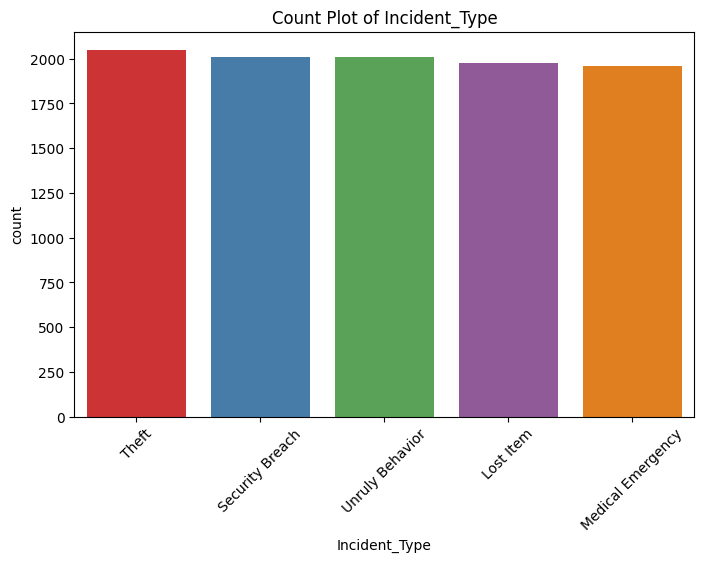

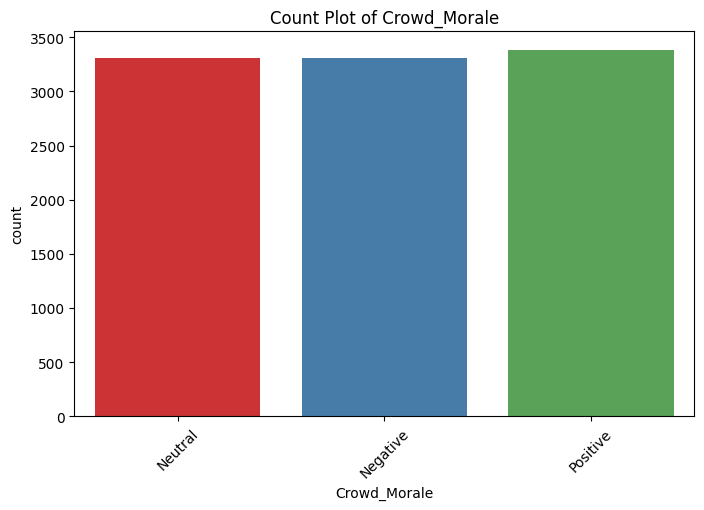

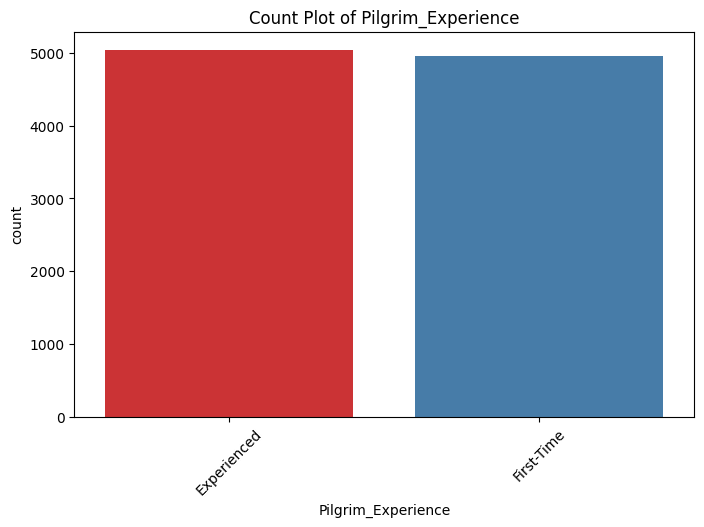

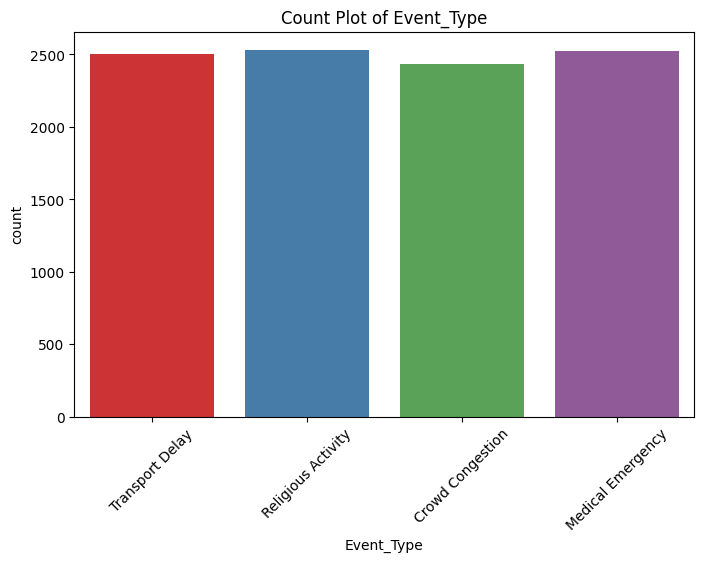

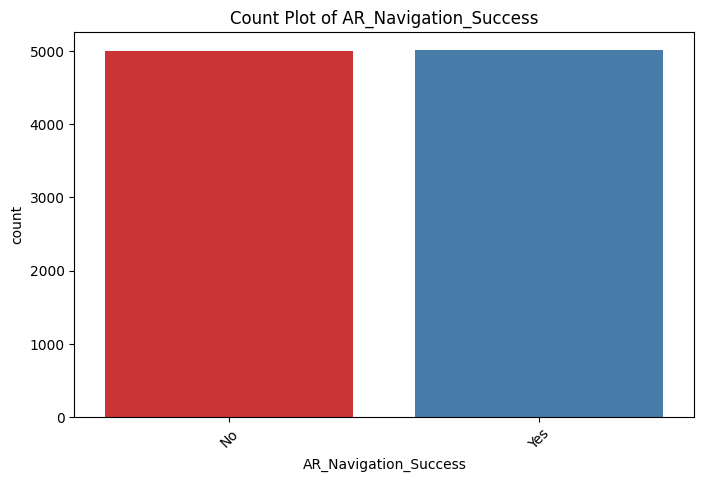

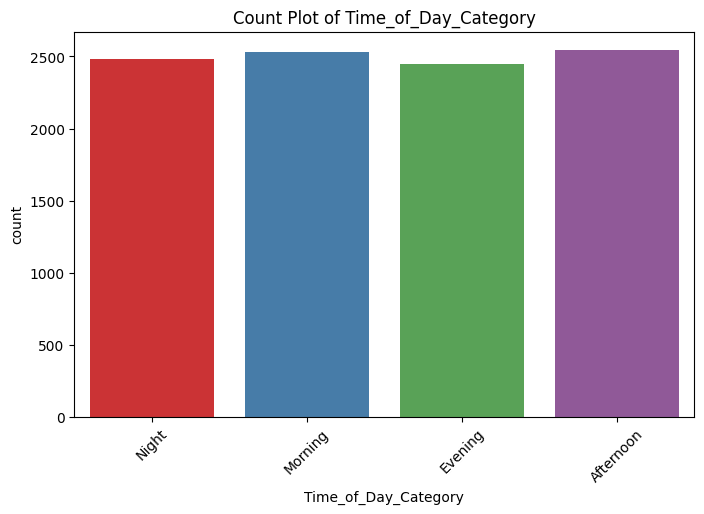

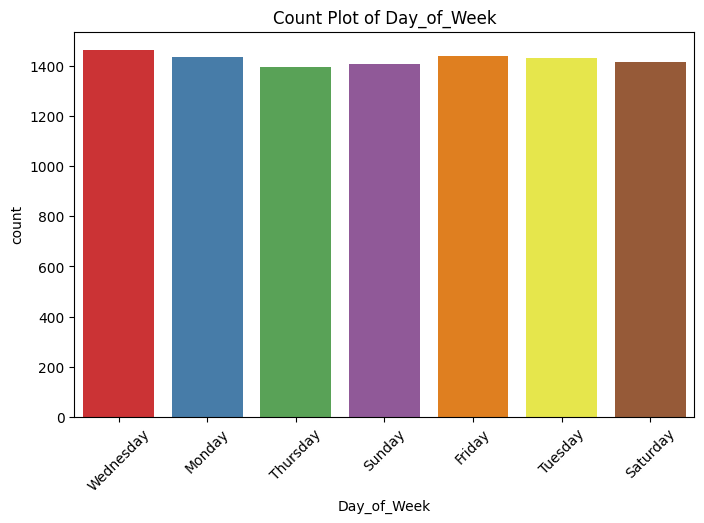

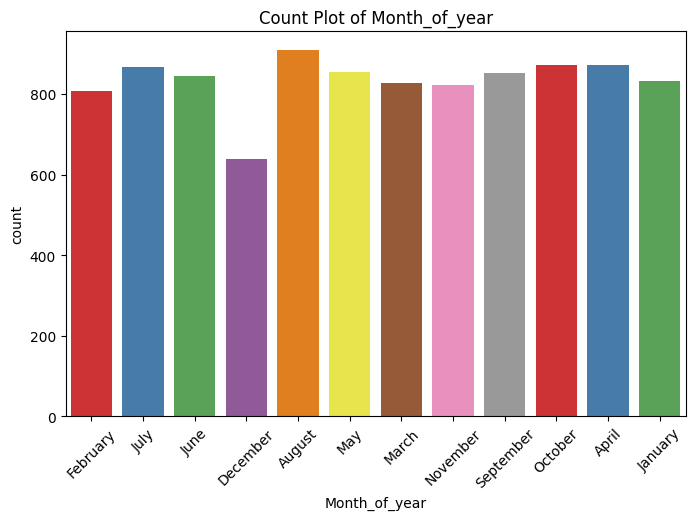

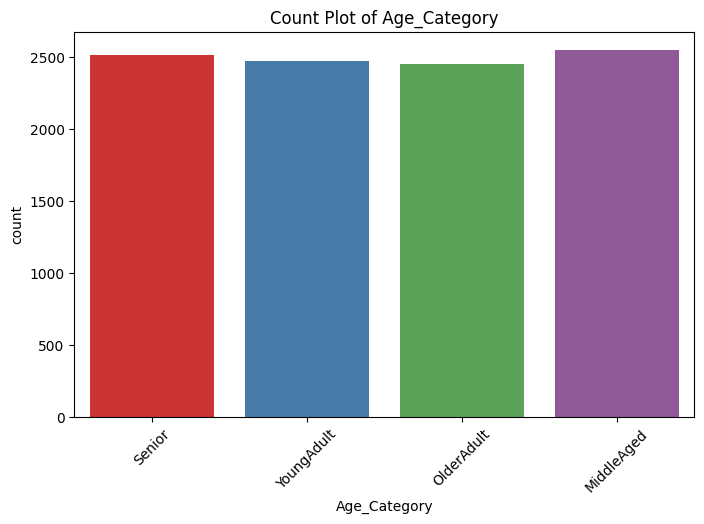

In [222]:
for col in cat_cols:
  plt.figure(figsize=(8, 5))
  sns.countplot(x=col, data=df , palette='Set1')
  plt.title(f'Count Plot of {col}')
  plt.xticks(rotation=45)
  plt.show()

In [296]:
plt.figure(figsize=(10, 6))
plot = px.density_mapbox(lat=df['Location_Lat'], lon=df['Location_Long'],
                        zoom=5 , radius=4,
                       mapbox_style='carto-positron')
plot.update_layout(title='Location Density Map')
plot.show()

<Figure size 1000x600 with 0 Axes>

### **2.  Medium EDA(Exploring Relationships and Patterns)**

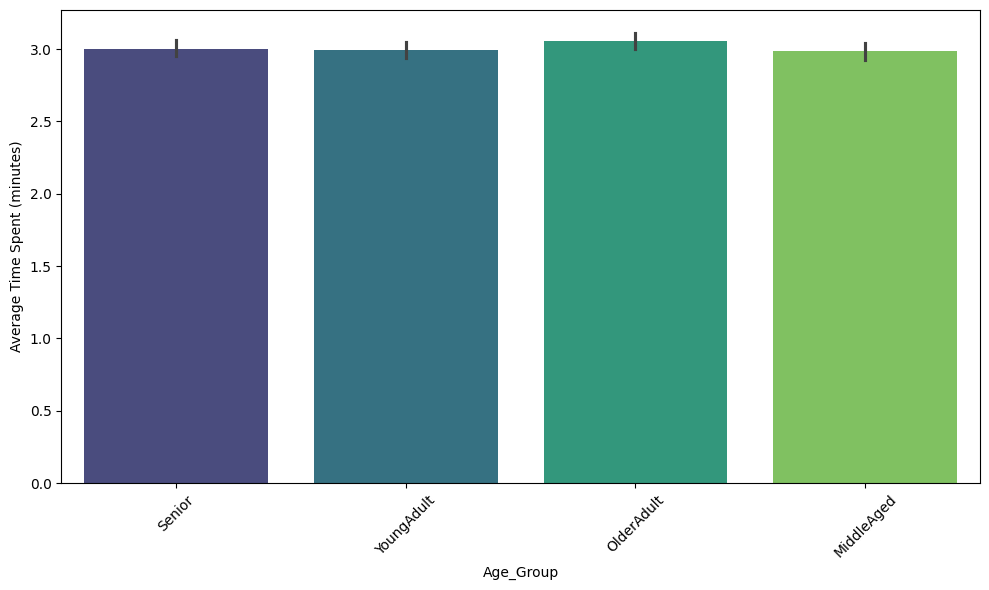

In [232]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age_Category', y='Satisfaction_Rating', palette='viridis')
plt.xlabel('Age_Group')
plt.ylabel('Average Time Spent (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

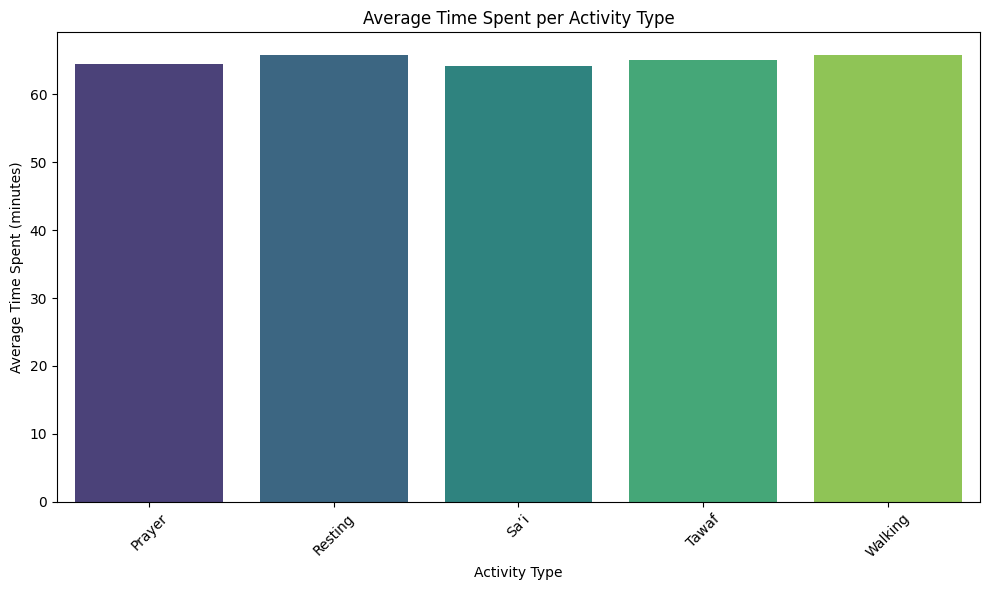

In [233]:
plt.figure(figsize=(10, 6))
sns.barplot(data=average_time_per_activity, x='Activity_Type', y='Time_Spent_at_Location_minutes', palette='viridis')
plt.title('Average Time Spent per Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Average Time Spent (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

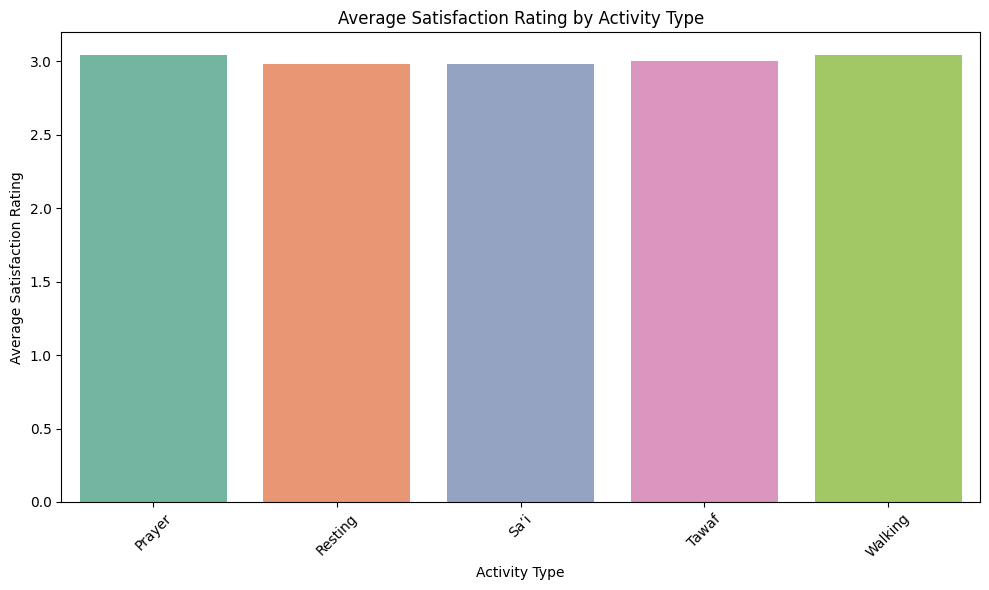

In [234]:
average_satisfaction_per_activity = df.groupby('Activity_Type')['Satisfaction_Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_satisfaction_per_activity, x='Activity_Type', y='Satisfaction_Rating', palette='Set2')
plt.title('Average Satisfaction Rating by Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Average Satisfaction Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

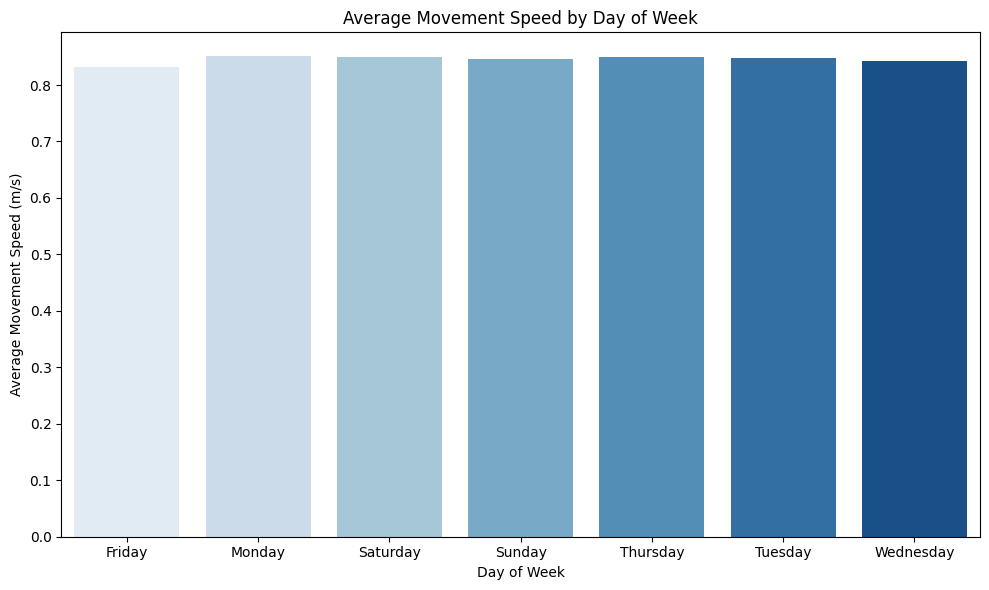

In [235]:
average_speed_per_day = df.groupby('Day_of_Week')['Movement_Speed'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_speed_per_day, x='Day_of_Week', y='Movement_Speed', palette='Blues')
plt.title('Average Movement Speed by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Movement Speed (m/s)')
plt.tight_layout()
plt.show()

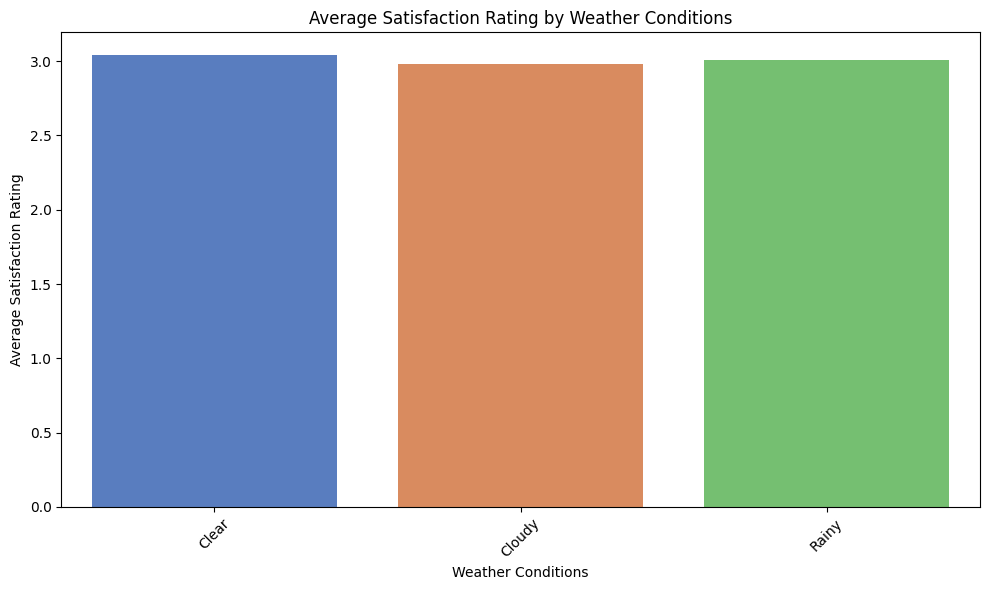

In [236]:
average_satisfaction_weather = df.groupby('Weather_Conditions')['Satisfaction_Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_satisfaction_weather, x='Weather_Conditions', y='Satisfaction_Rating', palette='muted')
plt.title('Average Satisfaction Rating by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Satisfaction Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

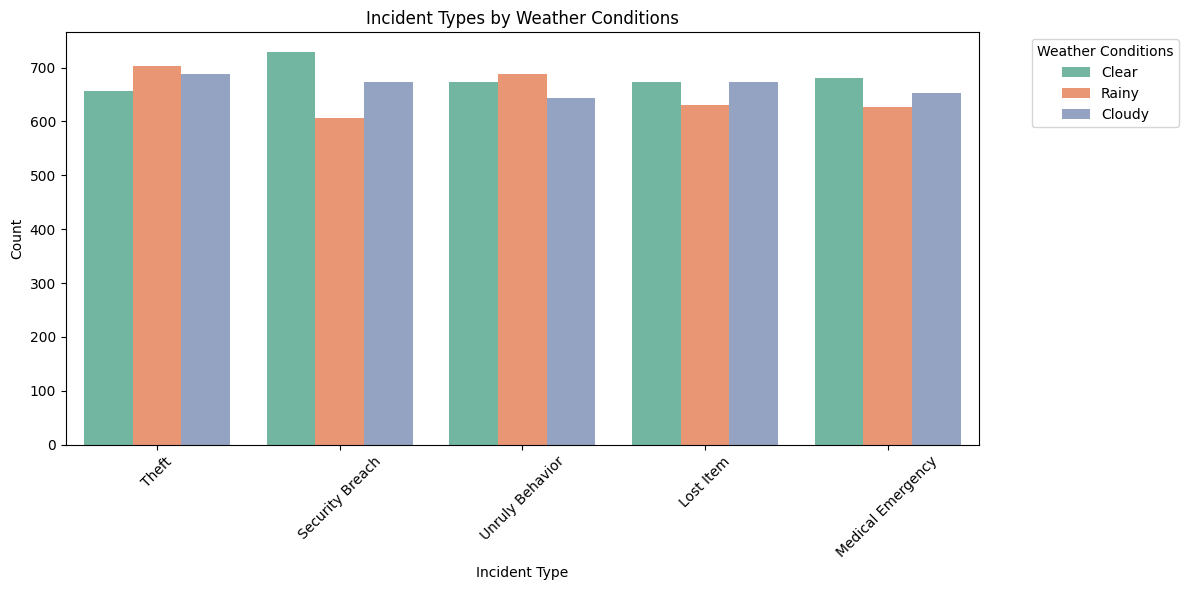

In [237]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Incident_Type', hue='Weather_Conditions', palette='Set2')
plt.title('Incident Types by Weather Conditions')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Weather Conditions',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

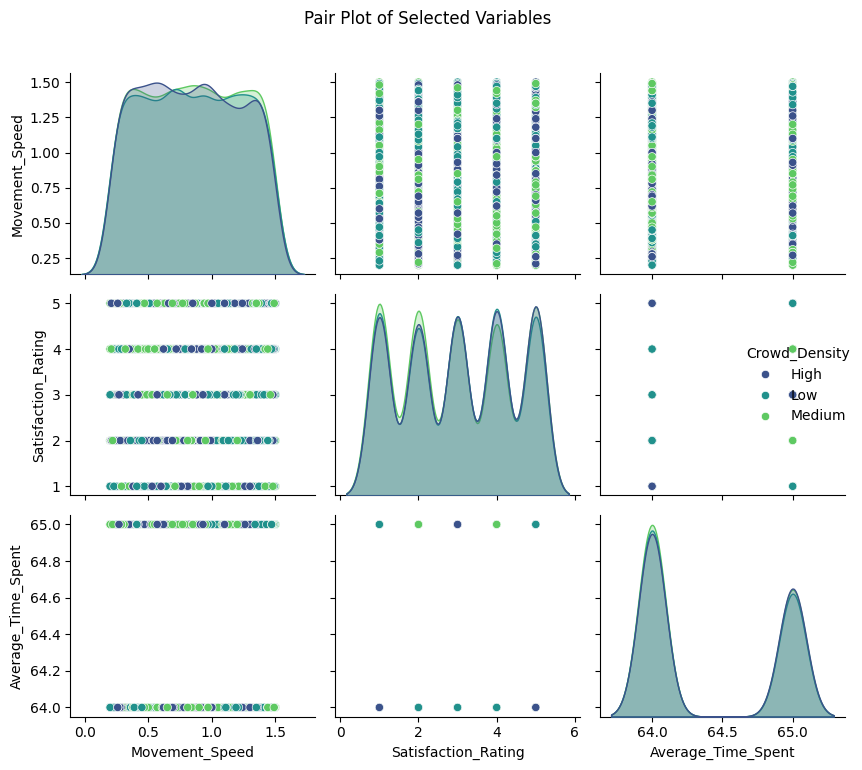

In [238]:
selected_columns = ['Crowd_Density', 'Movement_Speed', 'Satisfaction_Rating', 'Average_Time_Spent']
plt.figure(figsize=(12, 8))
sns.pairplot(df[selected_columns], diag_kind='kde', palette='viridis' , hue='Crowd_Density')
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.tight_layout()
plt.show()

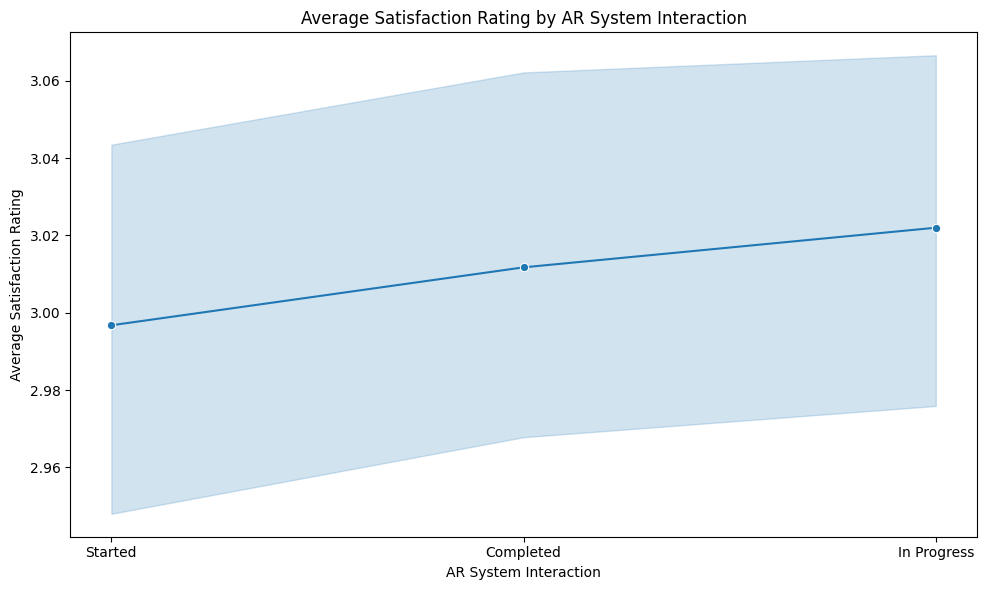

In [239]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='AR_System_Interaction', y='Satisfaction_Rating', palette='coolwarm', marker='o')
plt.title('Average Satisfaction Rating by AR System Interaction')
plt.xlabel('AR System Interaction')
plt.ylabel('Average Satisfaction Rating')
plt.tight_layout()
plt.show()

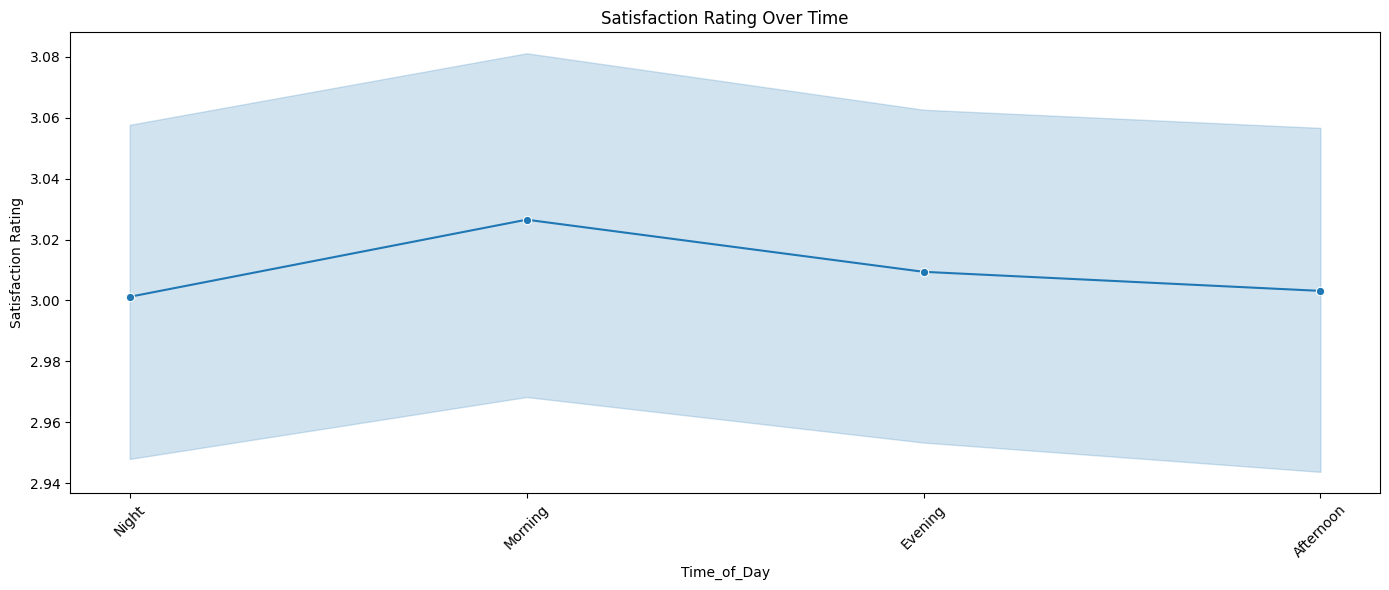

In [240]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Time_of_Day_Category', y='Satisfaction_Rating', marker='o')
plt.title('Satisfaction Rating Over Time')
plt.xlabel('Time_of_Day')
plt.ylabel('Satisfaction Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

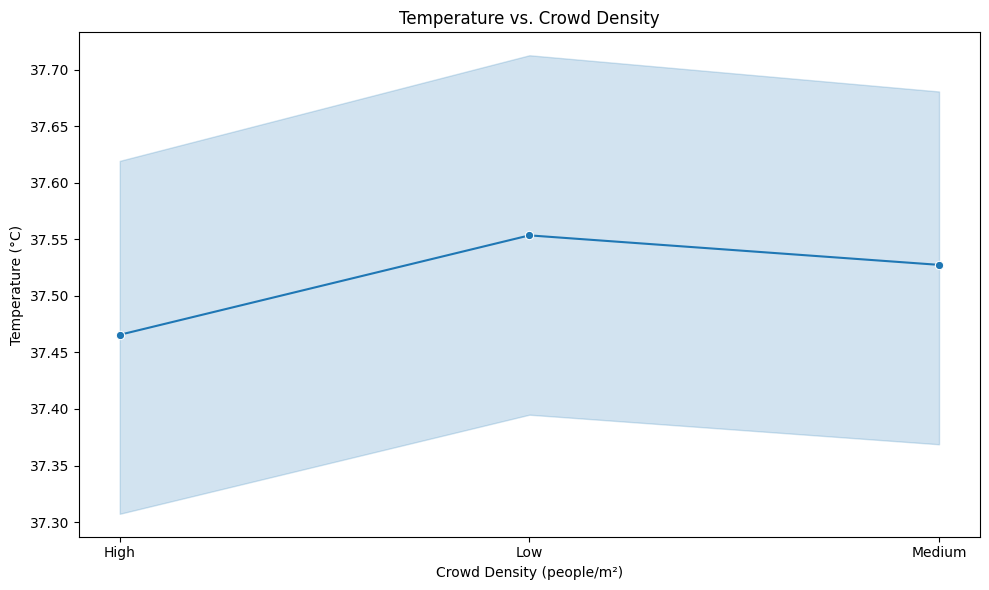

In [241]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='Temperature', x='Crowd_Density', marker='o')
plt.title('Temperature vs. Crowd Density')
plt.ylabel('Temperature (°C)')
plt.xlabel('Crowd Density (people/m²)')
plt.tight_layout()
plt.show()

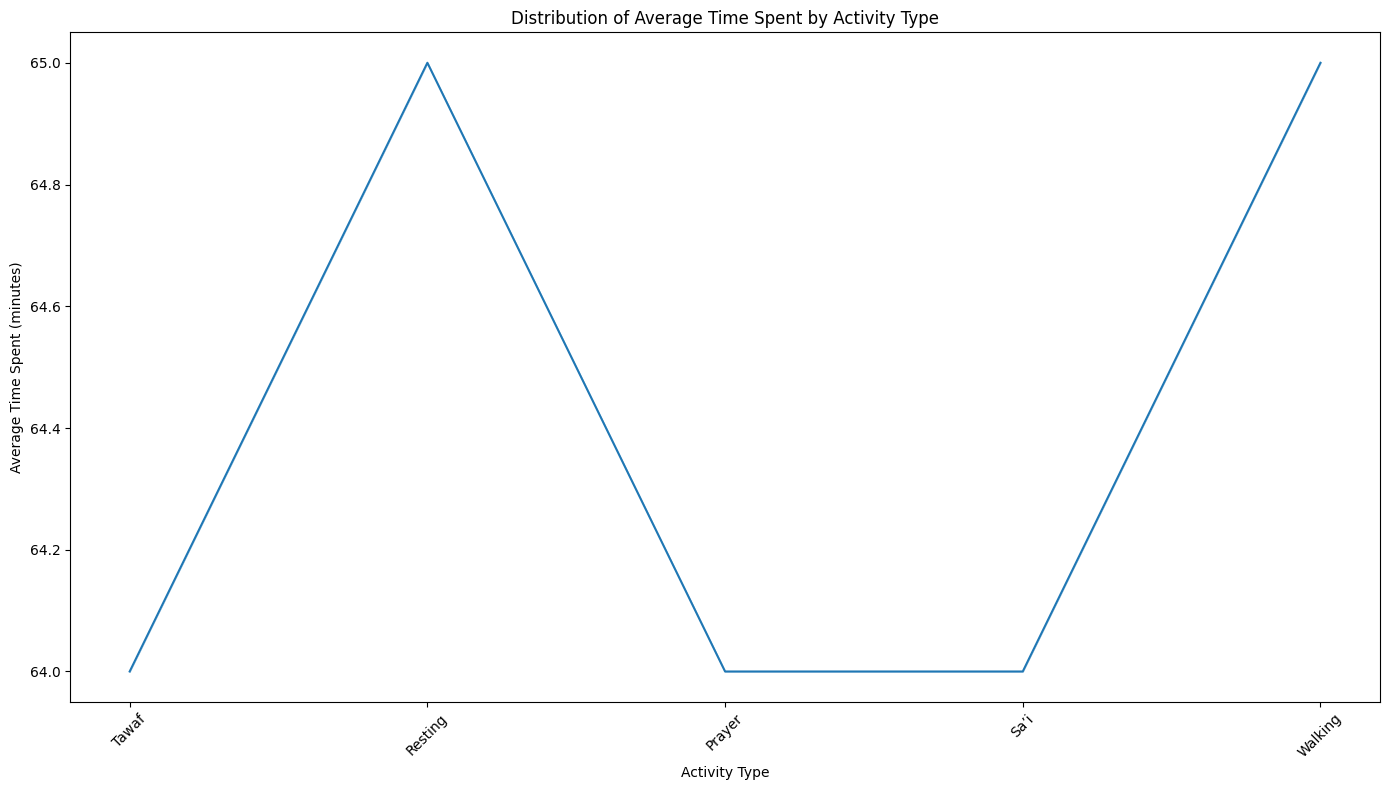

In [242]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df , x='Activity_Type' , y='Average_Time_Spent')
plt.title('Distribution of Average Time Spent by Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Average Time Spent (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

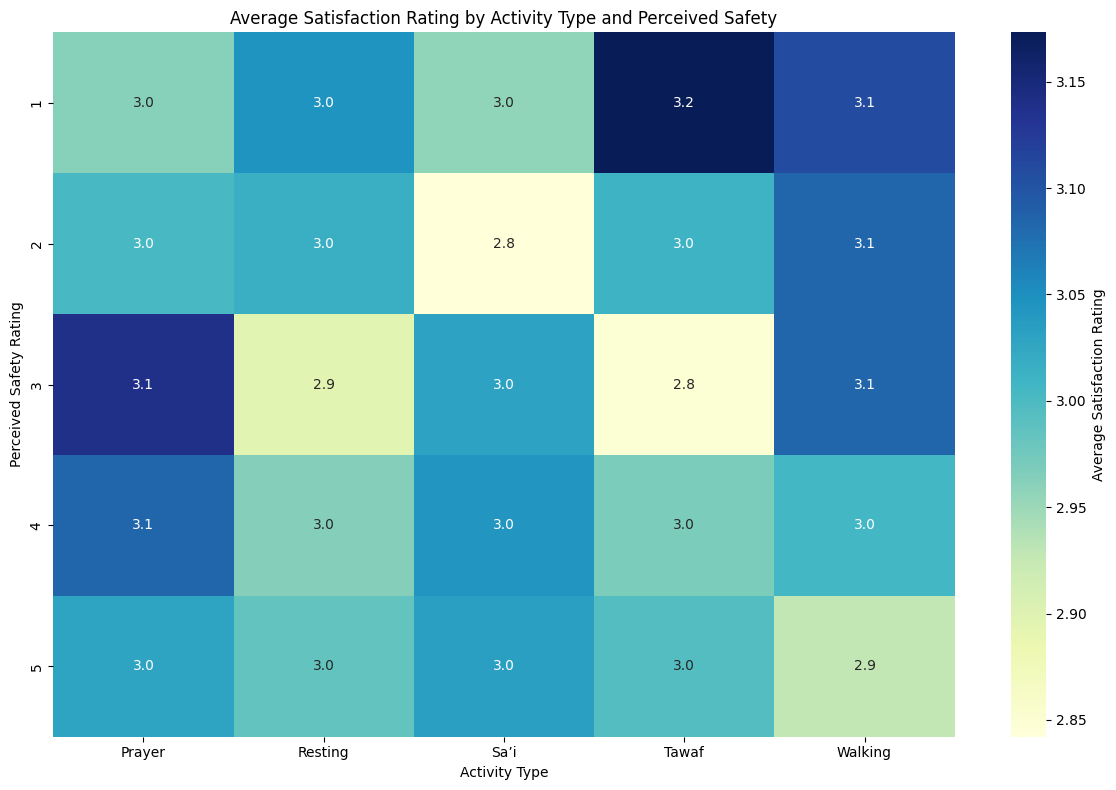

In [243]:
heatmap_data = df.pivot_table(values='Satisfaction_Rating', index='Perceived_Safety_Rating', columns='Activity_Type', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Average Satisfaction Rating'})
plt.title('Average Satisfaction Rating by Activity Type and Perceived Safety')
plt.xlabel('Activity Type')
plt.ylabel('Perceived Safety Rating')
plt.tight_layout()
plt.show()

### **3.  Advanced EDA(Deeper Insights)**

#### **3.1 Distribution Analysis**

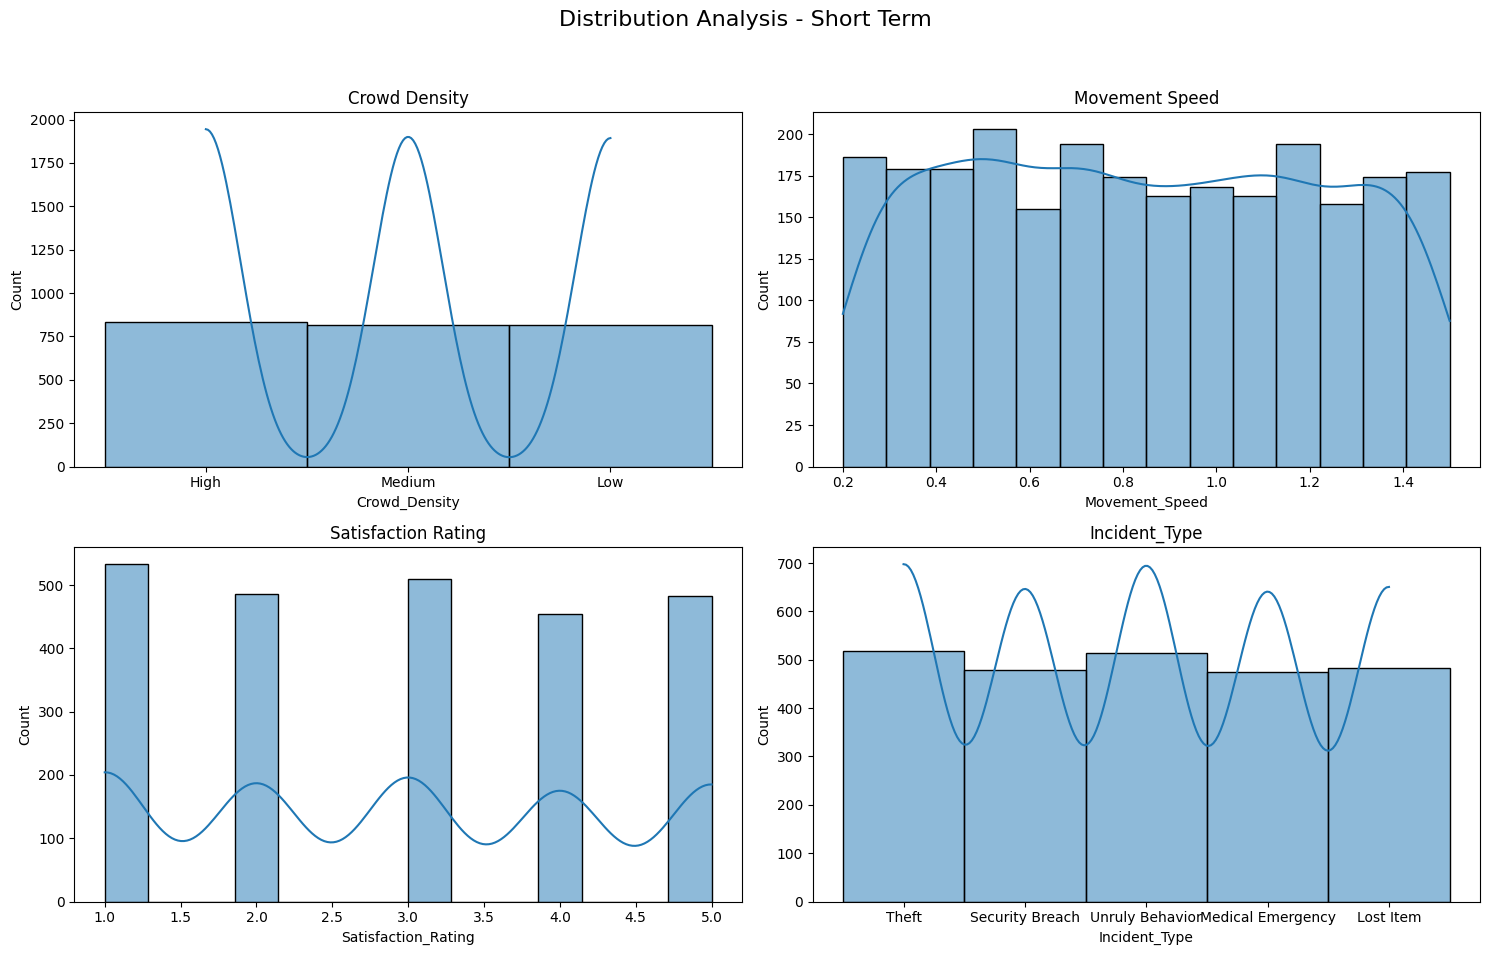

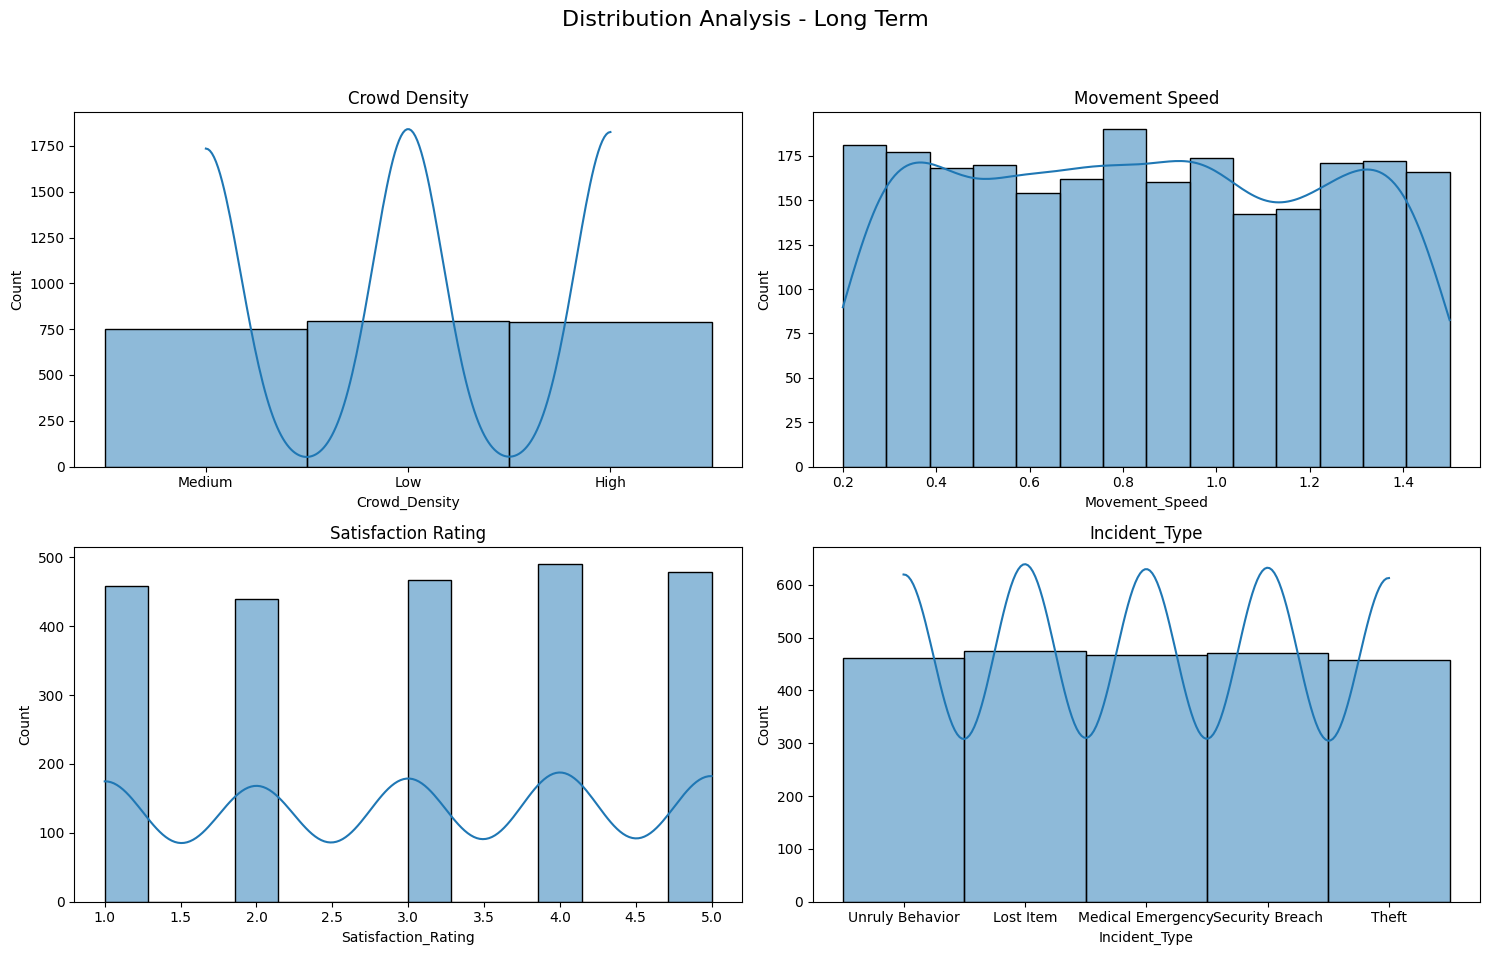

In [141]:
def create_distribution_plots(data, timeframe):

    plt.figure(figsize=(15, 10))
    plt.suptitle(f'Distribution Analysis - {timeframe}', fontsize=16)

    plt.subplot(2, 2, 1)
    sns.histplot(data['Crowd_Density'], kde=True)
    plt.title('Crowd Density')

    plt.subplot(2, 2, 2)
    sns.histplot(data['Movement_Speed'], kde=True)
    plt.title('Movement Speed')

    plt.subplot(2, 2, 3)
    sns.histplot(data['Satisfaction_Rating'], kde=True)
    plt.title('Satisfaction Rating')

    plt.subplot(2, 2, 4)
    sns.histplot(data['Incident_Type'], kde=True)
    plt.title('Incident_Type')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

short_term_data = df[df['Month_of_year'].isin(['January', 'February', 'March'])]
long_term_data = df[df['Month_of_year'].isin(['October', 'November', 'December'])]

create_distribution_plots(short_term_data, 'Short Term')
create_distribution_plots(long_term_data, 'Long Term')

#### **3.2 Cumulative Trends Analysis**

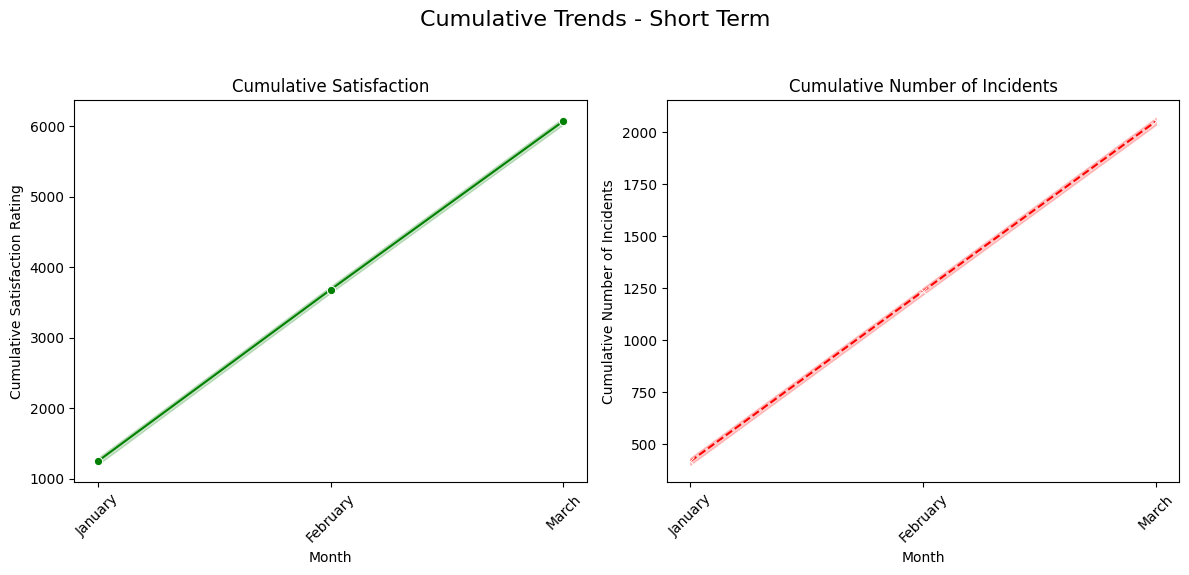

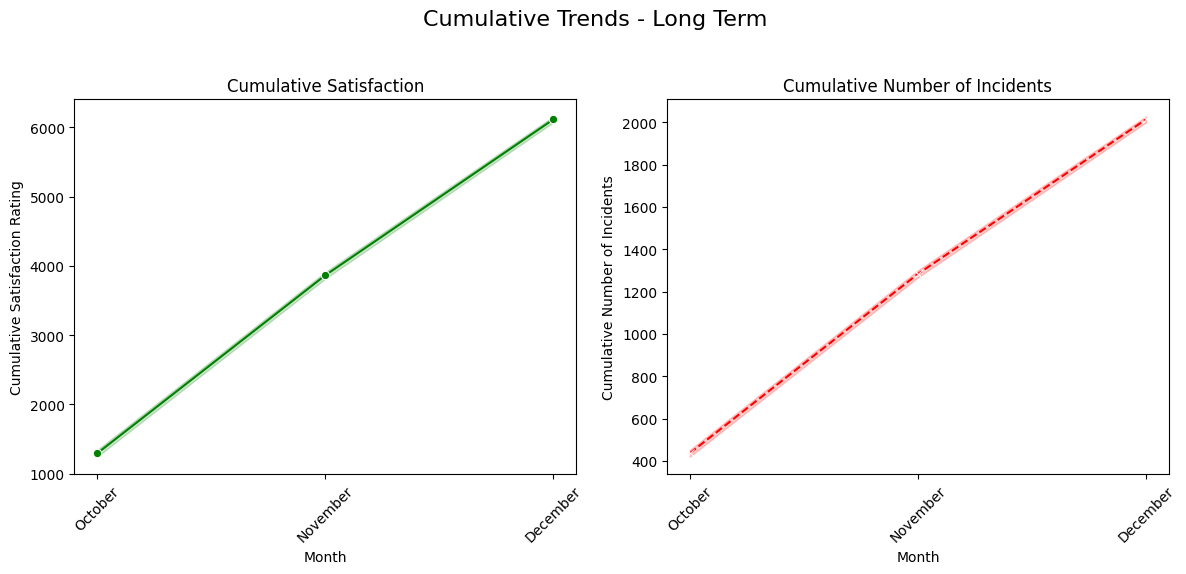

In [138]:
def create_cumulative_plots(data, timeframe, time_col='Month_of_year'):
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    data[time_col] = pd.Categorical(data[time_col], categories=month_order, ordered=True)

    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Cumulative Trends - {timeframe}', fontsize=16)

    plt.subplot(1, 2, 1)
    cumulative_satisfaction = data.sort_values(by=time_col)['Satisfaction_Rating'].cumsum()
    sns.lineplot(x=data[time_col], y=cumulative_satisfaction, marker='o', linestyle='-', color='green')
    plt.title('Cumulative Satisfaction')
    plt.xlabel('Month')
    plt.ylabel('Cumulative Satisfaction Rating')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    data['Incident_Count'] = data['Incident_Type'].notnull().astype(int)
    cumulative_incidents = data.sort_values(by=time_col)['Incident_Count'].cumsum()
    sns.lineplot(x=data[time_col], y=cumulative_incidents, marker='x', linestyle='--', color='red')
    plt.title('Cumulative Number of Incidents')
    plt.xlabel('Month')
    plt.ylabel('Cumulative Number of Incidents')
    plt.xticks(rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

short_term_data = df[df['Month_of_year'].isin(['January', 'February', 'March'])]
long_term_data = df[df['Month_of_year'].isin(['October', 'November', 'December'])]

create_cumulative_plots(short_term_data, 'Short Term')
create_cumulative_plots(long_term_data, 'Long Term')

#### **3.3 Handling outliers**

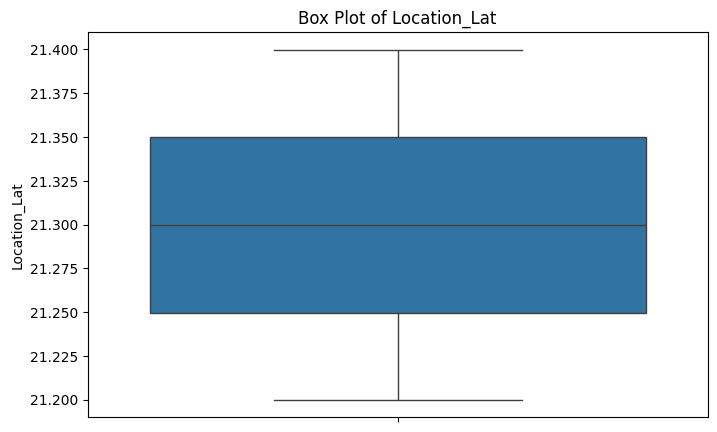

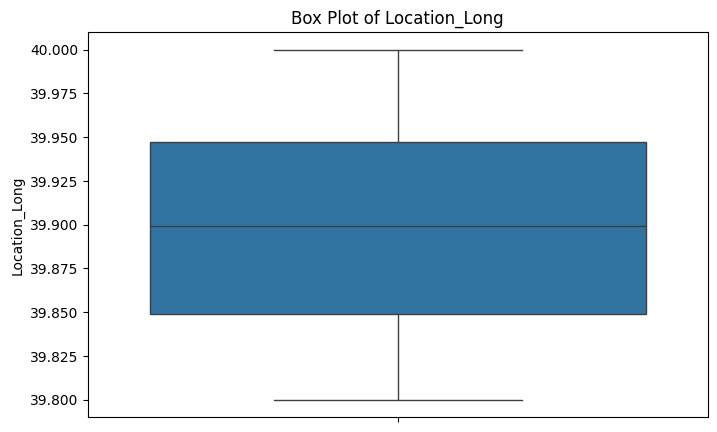

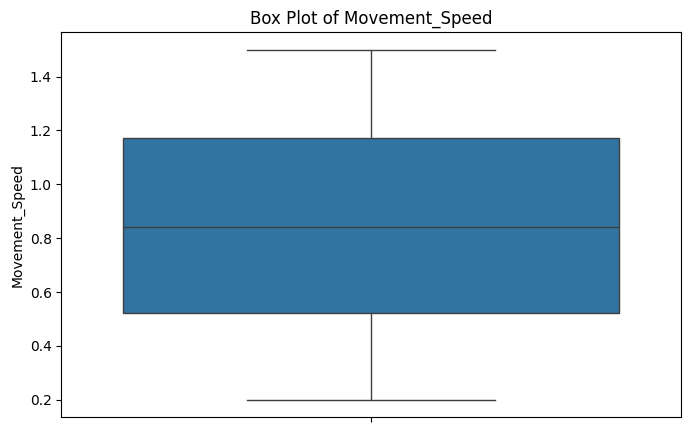

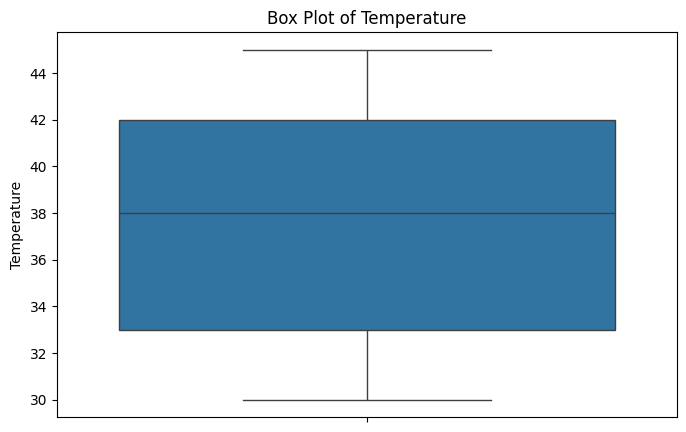

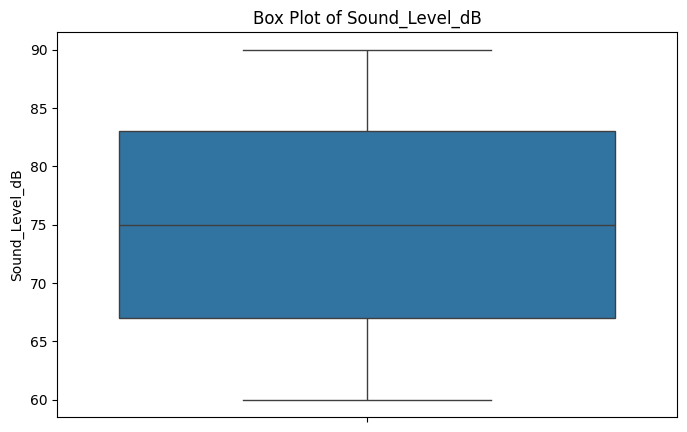

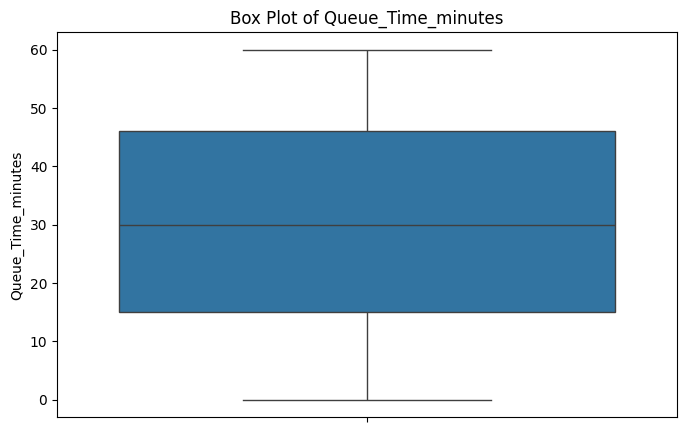

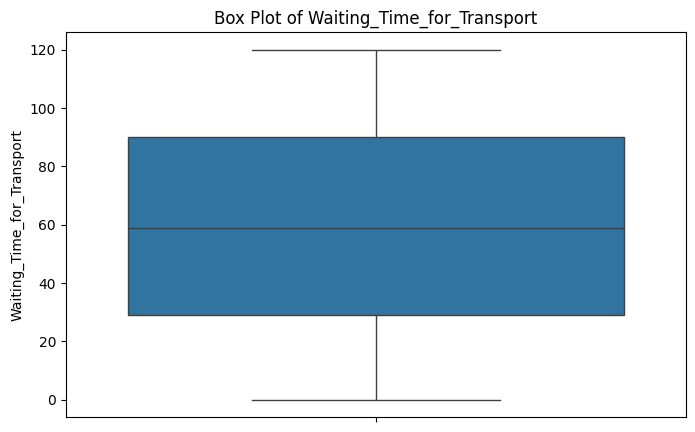

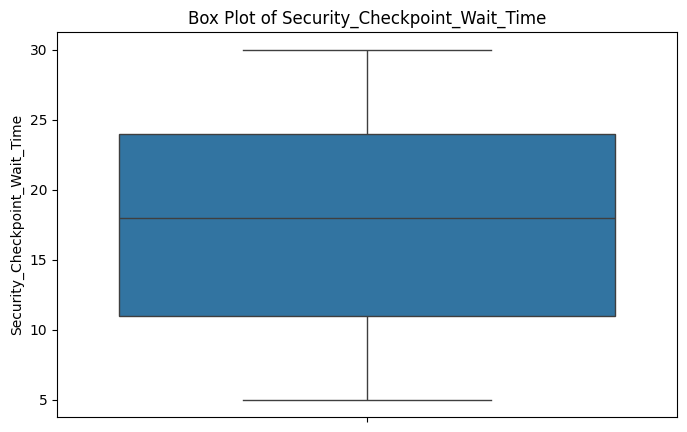

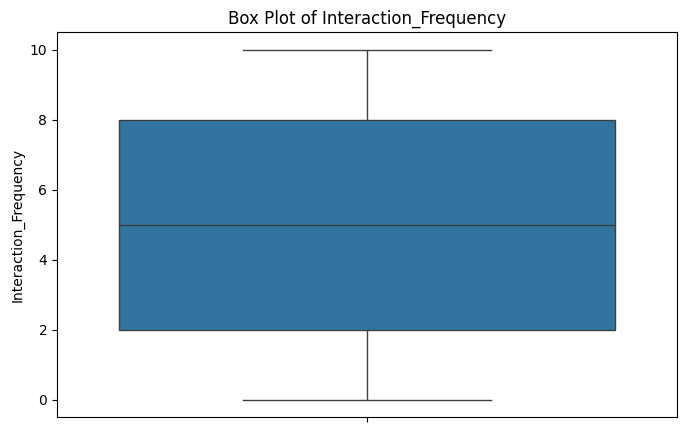

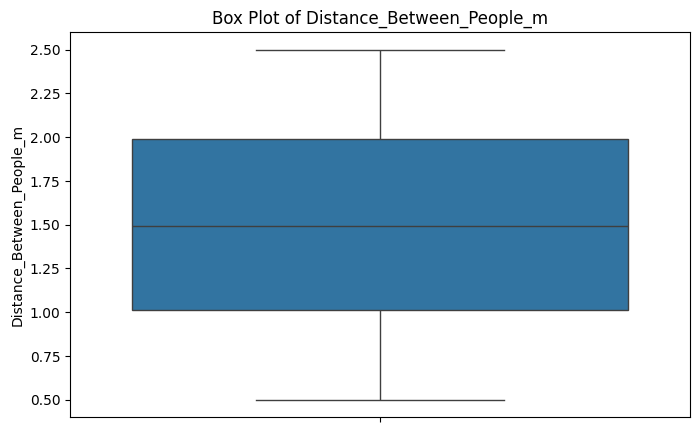

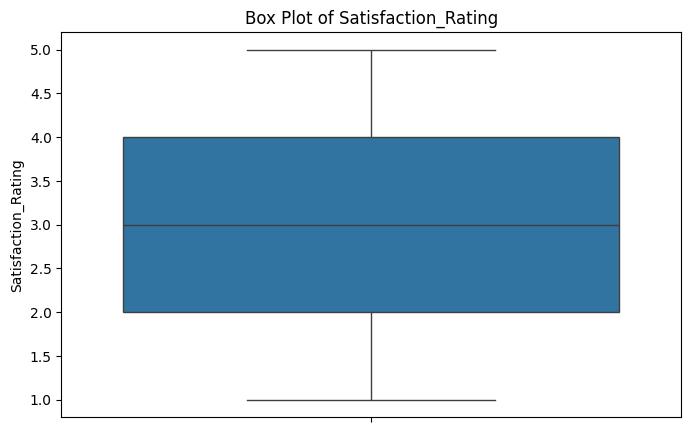

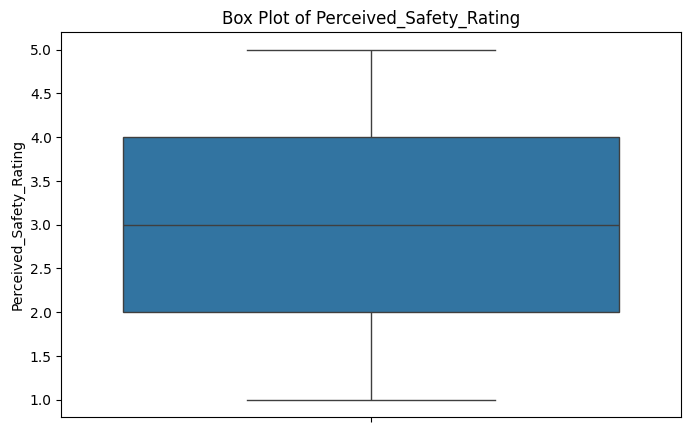

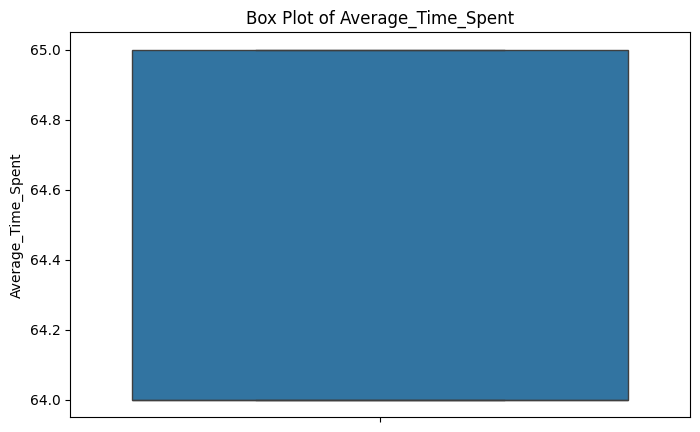

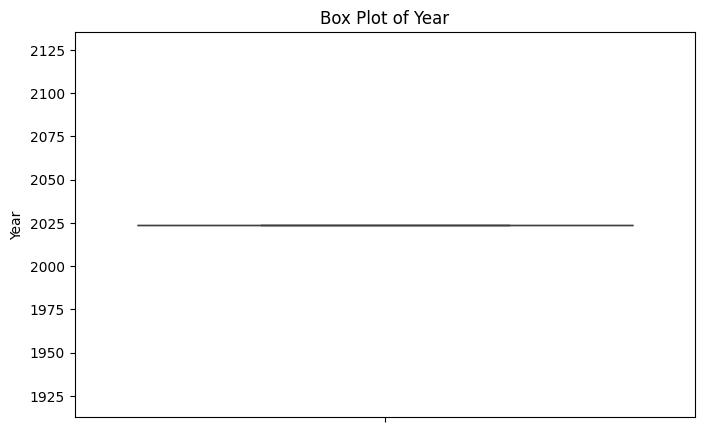

In [142]:
for col in num_cols:
  plt.figure(figsize=(8, 5))
  sns.boxplot(df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

In [ ]:
# No outliers in Dataset

#### **3.4 Encoding categorical Data**

In [259]:
hot_cols = ['Activity_Type','Weather_Conditions','AR_System_Interaction','Event_Type','Time_of_Day_Category','Day_of_Week','Month_of_year','Health_Condition','Nationality',
            'Transport_Mode','Incident_Type','Event_Type','Age_Category']
label_cols = ['Crowd_Density','Fatigue_Level','Stress_Level','Emergency_Event','Crowd_Morale','Pilgrim_Experience','AR_Navigation_Success']

In [260]:
df = pd.get_dummies(df, columns=hot_cols, dtype=int)

In [261]:
le=LabelEncoder()
for col in label_cols:
  df[col] = le.fit_transform(df[col])

#### **3.5 Machine Learning**

In [444]:
threshold = 0.01

correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["AR_Navigation_Success"]) > threshold].tolist()
high_corr_features.remove("AR_Navigation_Success")
print(high_corr_features)

X_selected = df[high_corr_features]
Y = df["AR_Navigation_Success"]

['Location_Lat', 'Temperature', 'Waiting_Time_for_Transport', 'Emergency_Event', 'Pilgrim_Experience', 'Interaction_Frequency', 'Satisfaction_Rating', 'Perceived_Safety_Rating', 'Weather_Conditions_Clear', 'Weather_Conditions_Rainy', 'AR_System_Interaction_Completed', 'AR_System_Interaction_In Progress', 'Time_of_Day_Category_Afternoon', 'Time_of_Day_Category_Night', 'Day_of_Week_Saturday', 'Day_of_Week_Thursday', 'Month_of_year_April', 'Month_of_year_December', 'Month_of_year_January', 'Month_of_year_March', 'Health_Condition_Fainting', 'Nationality_Indonesian', 'Nationality_Saudi', 'Age_Category_Senior']


In [445]:
X_train , X_test , y_train , y_test = train_test_split(X_selected , Y , test_size=0.2 , random_state=42)

In [446]:
model1 = LogisticRegression()
model1.fit(X_train , y_train)

LogisticRegression()

In [447]:
y_pred1 = model1.predict(X_test)

In [448]:
model2 = DecisionTreeClassifier()
model2.fit(X_train , y_train)

DecisionTreeClassifier()

In [449]:
y_pred2 = model2.predict(X_test)

In [450]:
model3 = RandomForestClassifier()
model3.fit(X_train , y_train)

RandomForestClassifier()

In [451]:
y_pred3 = model3.predict(X_test)

In [452]:
model4 = SVC()
model4.fit(X_train , y_train)

SVC()

In [453]:
y_pred4 = model4.predict(X_test)

In [454]:
model5 = KNeighborsClassifier()
model5.fit(X_train , y_train)

KNeighborsClassifier()

In [455]:
y_pred5 = model5.predict(X_test)

In [456]:
def evaluate_model(y_test, y_pred):
    model.score(X_train, y_train)
    accuracy_score
    classification_report
    confusion_matrix = evaluate_model(y_test, y_pred)


Model: LogisticRegression
Accuracy: 0.5125
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51      1005
           1       0.51      0.52      0.52       995

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000

Confusion Matrix:



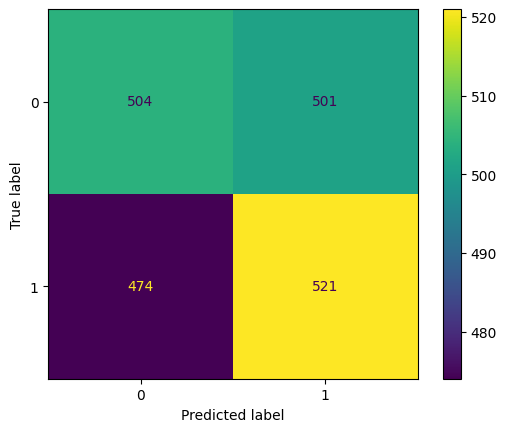

Model: DecisionTreeClassifier
Accuracy: 0.4985
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1005
           1       0.50      0.51      0.50       995

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

Confusion Matrix:



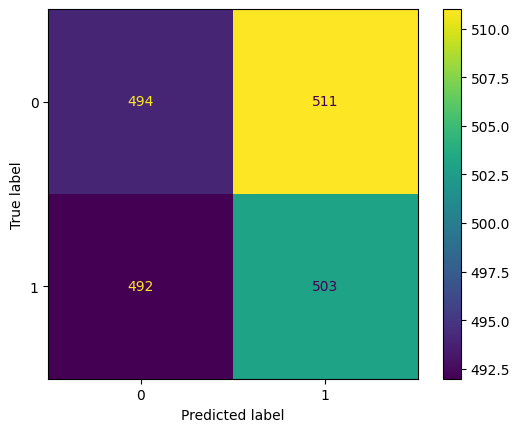

Model: RandomForestClassifier
Accuracy: 0.5315
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1005
           1       0.53      0.49      0.51       995

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.53      0.53      0.53      2000

Confusion Matrix:



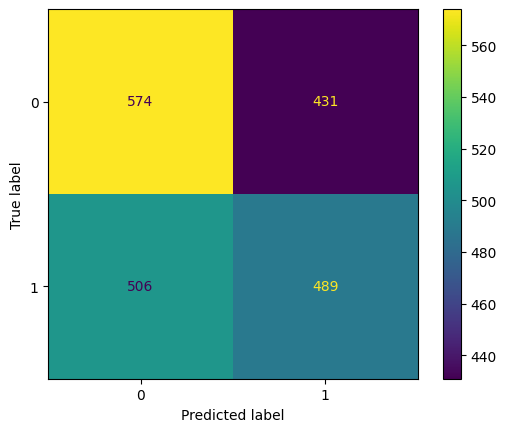

Model: SVC
Accuracy: 0.5045
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.54      0.52      1005
           1       0.50      0.47      0.49       995

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

Confusion Matrix:



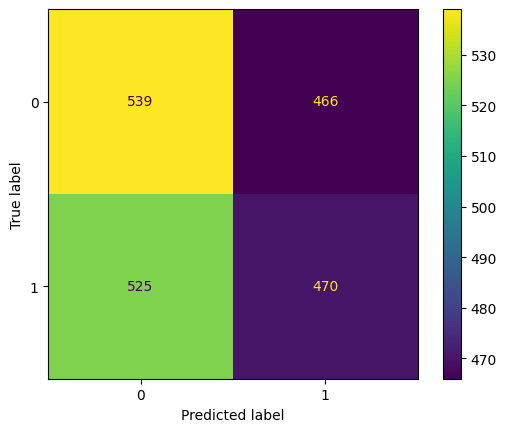

Model: KNeighborsClassifier
Accuracy: 0.514
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1005
           1       0.51      0.51      0.51       995

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000

Confusion Matrix:



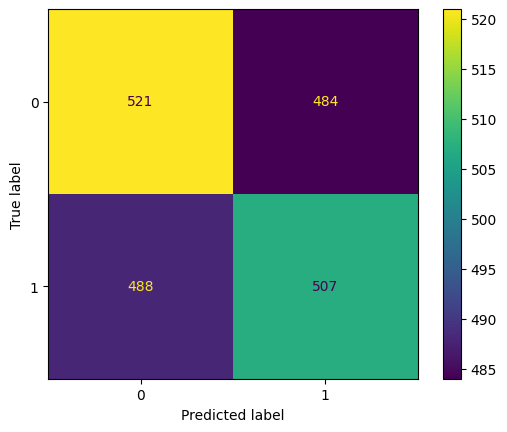

In [457]:
for model in [model1, model2, model3, model4, model5]:
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=[0, 1])
    cm_display.plot()
    plt.show()



# 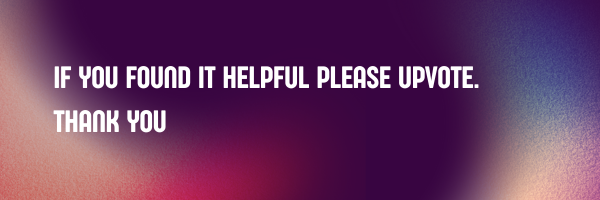